### Pre-steps 1: Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math as math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from os import system
from IPython.display import Image
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from vecstack import stacking
%matplotlib inline
sns.set(color_codes=True)

### Step1: Load the dataset

In [2]:
#step 1.1: Read the dataset
#data=pd.read_csv('Data - Parkinsons.csv')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/parkinson-disease-identification/Data - Parkinsons.csv


In [3]:
PD_file_path='../input/parkinson-disease-identification/Data - Parkinsons.csv'
data=pd.read_csv(PD_file_path)



### Step2: Eye-balling the raw data to understand the number of records, structure of the file, number of attributes, types of attributes and the likely challenges in the dataset. We will also state few observations w.r.t same.

In [4]:
# step 2.1: browse through the first few columns
data.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

##### This dataset is composed of a range of biomedical voice measurements. Each column in the table is a particular voice measure, and each row corresponds one of the voice recording from the individuals ("name" column). The rows contain an instance corresponding to one voice recording; There are around six recordings per patient.
##### The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

In [5]:
# Step 2.2: Understand the shape of the data
shape_data=data.shape
print('The shape of the dataframe is',shape_data,'which means there are',shape_data[0],'rows of voice recordings and',shape_data[1],'attributes of patients.')

The shape of the dataframe is (195, 24) which means there are 195 rows of voice recordings and 24 attributes of patients.


In [6]:
# Step 2.3: Identify Duplicate records in the data 
# It is very important to check and remove data duplicates. 
# Else our model may break or report overly optimistic / pessimistic performance results
dupes=data.duplicated()
print(' The number of duplicates in the dataset are:',sum(dupes),'\n','Hence, it is quite evident that there are no duplicates in the dataset')

 The number of duplicates in the dataset are: 0 
 Hence, it is quite evident that there are no duplicates in the dataset


In [7]:
# Step 2.4: Lets analyze the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Refering the summary of the dataframe as above; In the dataset, all the columns appear to be of numerical data with data type Integer and float. There are no null values.<br>

The dataset contains the following variables:

Numerical variables are as below:

- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
- NHR,HNR - Two measures of ratio of noise to tonal components in the voice
- status - Health status of the subject (one) - Parkinson's, (zero) - healthy
- RPDE,D2 - Two nonlinear dynamical complexity measures
- DFA - Signal fractal scaling exponent
- spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 9. car name: string (unique for each instance)

The Categorical nominal variable is :<br>

- Name - ASCII subject name and recording number<br>

In [8]:
# Step 2.5: lets evaluate statistical details of the dataset. 
#We will also add skewness column to the details to get a holistic view of the dataset from statistical perspective
cname=data.columns
data_desc=data.describe().T
data_desc['Skewness']=round(data[cname].skew(),4)
pd.DataFrame(data_desc)

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  Skewness  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000    0.5917  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000    2.5421  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000    1.2174  
MDVP:Jitter(%)      0.004940    0.007365    0.033160    3.0849  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260    2.6491  
MDVP:RAP            0.002500    0.003835    0.021440    3.3607  
MDVP:PPQ            0.002690    0.003955    0.019580    3.0739  
Jitter:DDP          0.007490    0.011505    0.064330    3.3621  
MDVP:Shimmer        0.022970    0.037885    0.119080    1.6665  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000    1.9994  
Shimmer:APQ3        0.012790    0.020265    0.056470    1.5806  
Shimmer:APQ5        0.013470    0.022380    0.079400    1.7987  
MDVP:APQ            0.018260    0.029400    0.137780    2.6180  
Shimmer:DDA         0.038360    0.060795    0.169420    1.5806  
NHR                 0.011660    0.025640    0.314820    4.2207  
HNR                22.085000   25.075500   33.047000   -0.5143  
status              1.000000    1.000000    1.000000   -1.1877  
RPDE                0.495954    0.587562    0.685151   -0.1434  
DFA                 0.722254    0.761881    0.825288   -0.0332  
spread1            -5.720868   -5.046192   -2.434031    0.4321  
spread2             0.218885    0.279234    0.450493    0.1444  
D2                  2.361532    2.636456    3.671155    0.4304  
PPE                 0.194052    0.252980    0.527367    0.7975

- Skewness: We have also added skewness column to understand the skewness of each attribute which can also be easily compared to mean and median.<br> Data seems to be skewed for MDVP:Fhi(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:APQ, NHR, MDVP:Shimmer(dB); which is also quite evident from the fact that the mean and median for these attributes are quite far. There might also be potential outliars which we will evaluate in the next section.<br>
- For the atributes: MDVP:Flo(Hz), MDVP:Shimmer, Shimmer:APQ3, Shimmer:APQ5, Shimmer:DDA, status; there is slight skewness.<br>
- For the attributes:MDVP:Fo(Hz), HNR, RPDE, DFA, spread1, spread2, D2, PPE skewness is negligible.<br>
- In the next section, we will discuss each attribute in details.

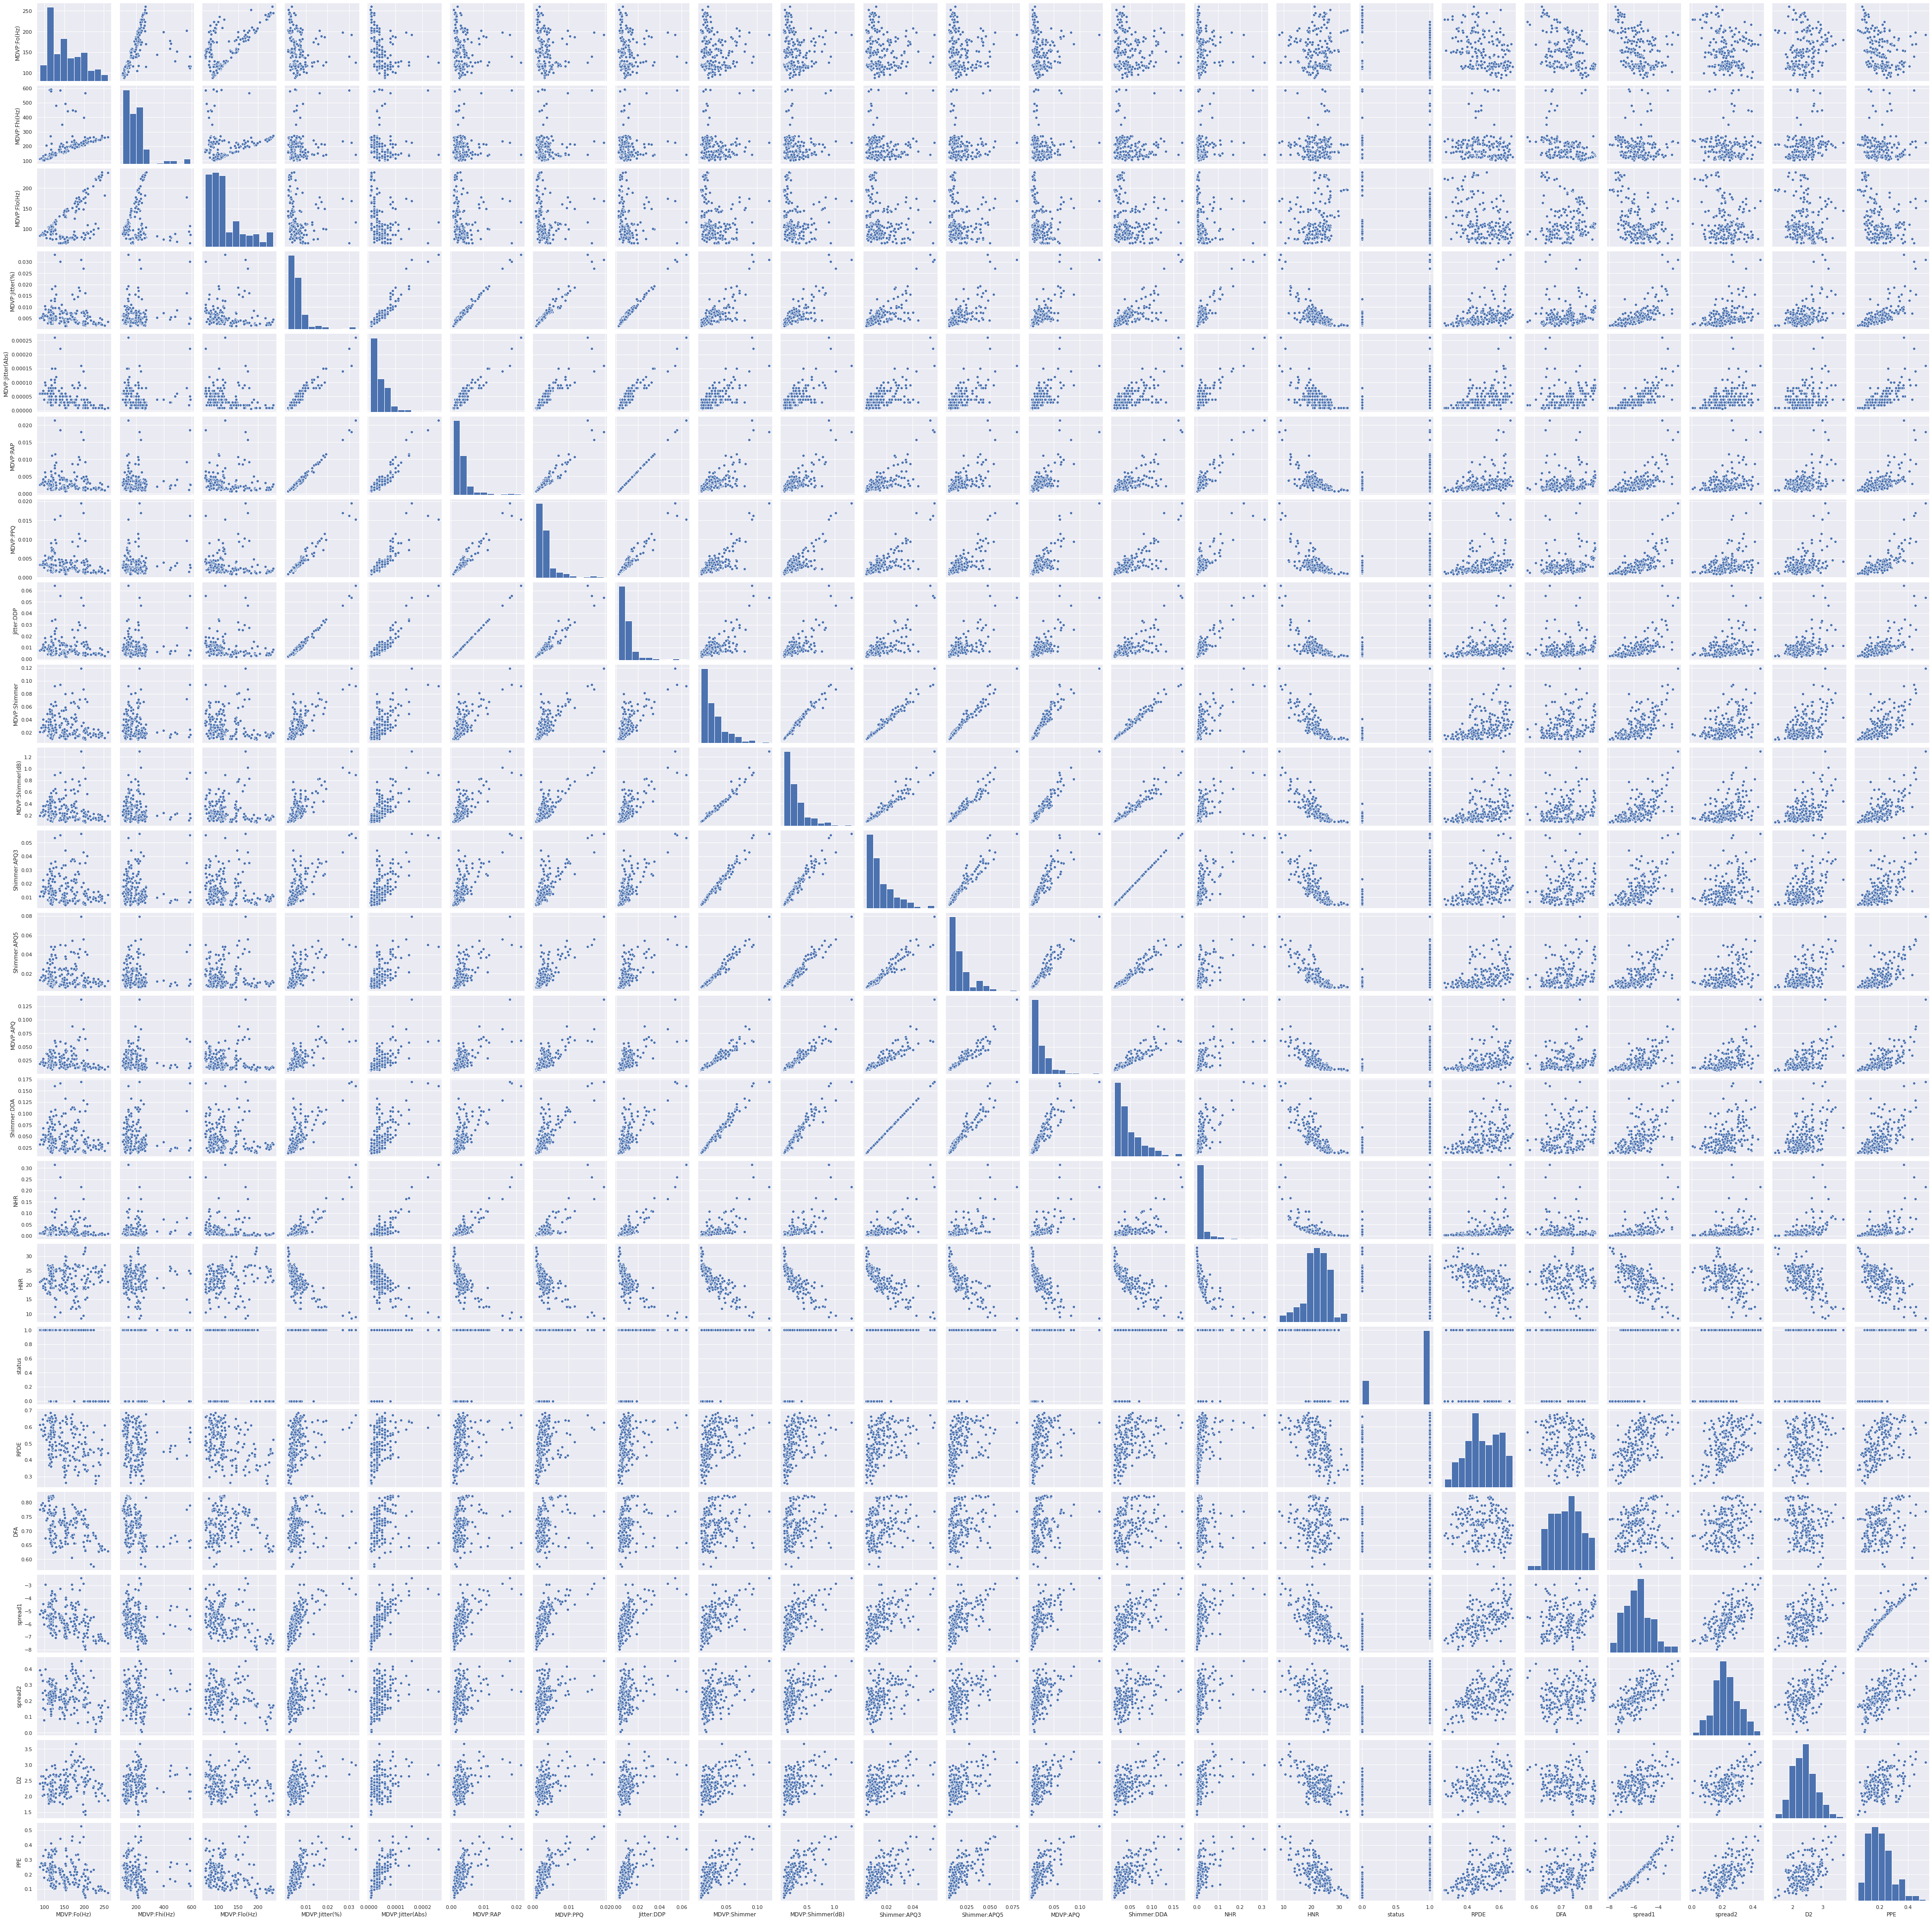

In [9]:
# Step 2.6: Lets visually understand if there is any correlation between the independent variables. 
usecols =[i for i in data.columns if i != ['name','status']]
sns.pairplot(data[usecols]);

Given the count of the attributes; there is little visibility in the Pairplot. There appears to be correlation between attributes but it is difficult to identify it visually. Hence, we will calculate correlation between the variables.

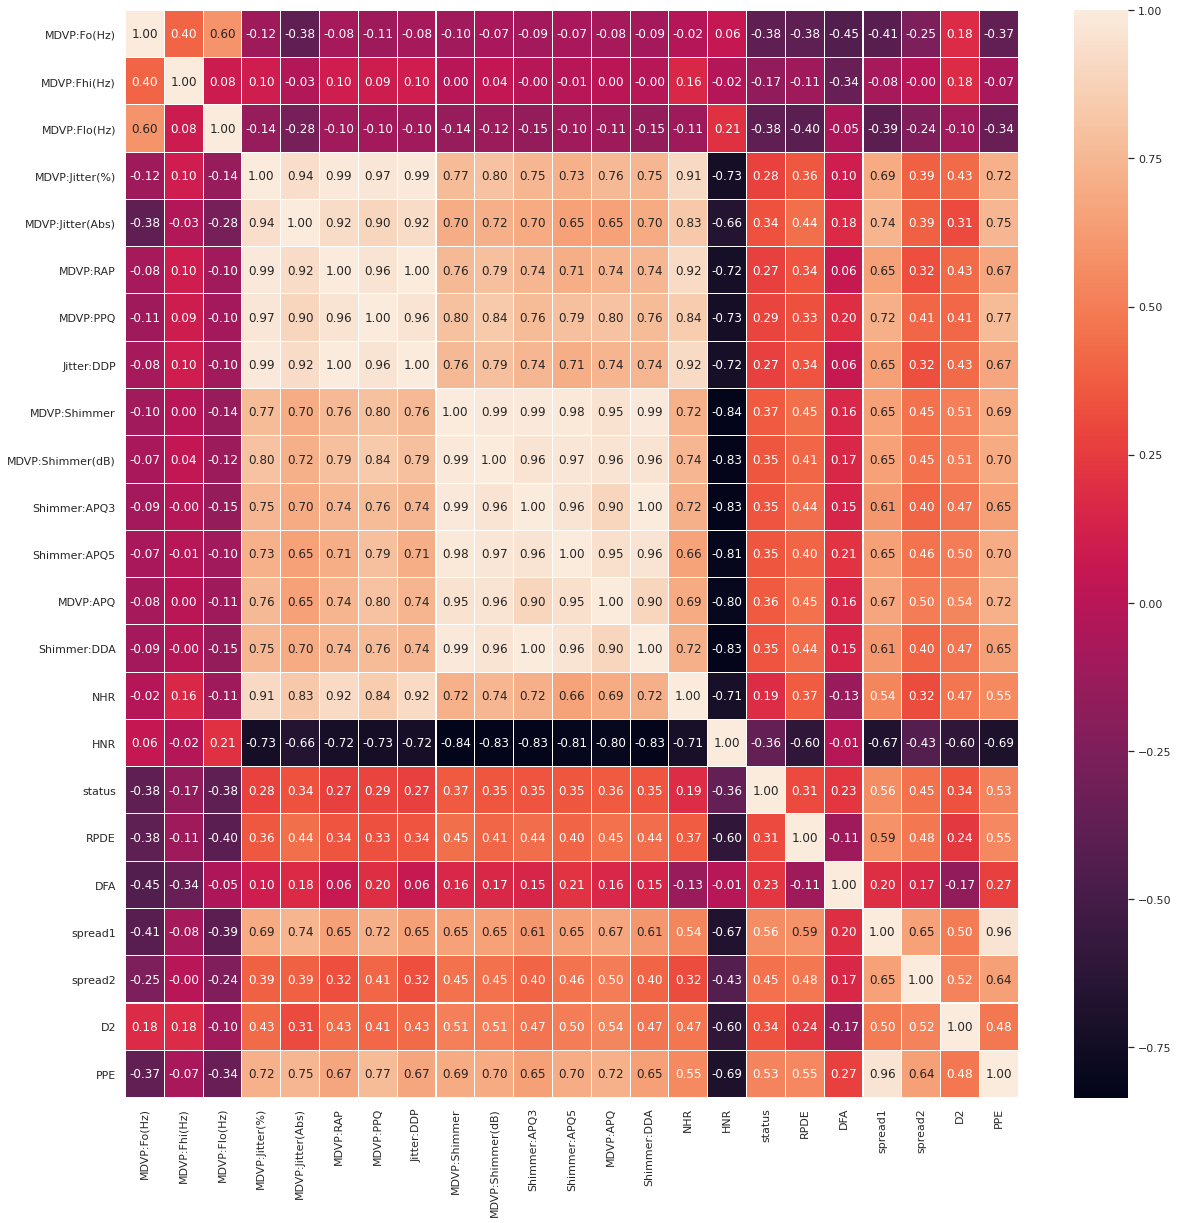

In [10]:
# Step 2.7: lets evaluate correlation between different attributes.
# The column name and status has been ignored from the correlation heatmap. 
#The reason for the same will be explained in the next section.
corr=data[usecols].corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr,annot=True,linewidth=0.05,ax=ax, fmt= '.2f');

There seems to be a high correlation between multiple independent variables.

Observations and likely challenges in the dataset:
1. MultiCollinearity: There seems to exist high correlation between multiple independent attributes. This might be a problem since, we would not be able to distinguish between the individual effects of the independent attributes on the dependent attribute. We'll try to identify the multi-collinearity by leveraging VIF (Variable Inflation Factor) and if it is found to be high then we will attempt at reducing the multi-collinearity by deleting few attributes with high VIF.
2. Scaling: Different independent attributes have different scales e.g: DB, %age, Hz etc 

### Step 2: Study the data distribution in each attribute, share your findings

There are <font color='blue'>__24 attributes__ </font> of the voice samples of subjects; which are grouped into <font color='blue'>12 groups. </font> Let's analyse the dataset. </br>
 We will take the approach of understanding and analysing the attributes in the groups.</br>
 We are going to perform the following 5 analysis on all the attributes (except name and status - Target variable)
 
 1. 5 point summary
 2. Outliar detection
 3. Skewness check
 4. Spread across the attribute
 5. Co-relation with other attributes
 
 
 For the target variable:
 
 1. Comparison between Status of the subject (PD or no PD) and other attribute leveraging different plots 
 

<font color='blue'> __Attribute Group 1 - Name:__ </font> Name is a redundant attribute; since no analysis can be performed on it and it is not relevant for the model as well. Hence, we will delete it from our data set.

In [11]:
udata=data.drop('name',axis=1)
udata.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 23 columns]

<font color='blue'> __Attribute Group 2 - MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz) :__  </font> From the data description section (step 2.5) which captures basic statistical information, it appear that all the attributes of group 2 have right skewness; given that mean is greater than median. Lets perform EDA on Group 2.

In [12]:
# Attributes in the Group
Atr1g2='MDVP:Fo(Hz)'
Atr2g2='MDVP:Fhi(Hz)'
Atr3g2='MDVP:Flo(Hz)'

In [13]:
#EDA 1: 5 point summary to understand spread
Atr1g2_5pt=udata.describe().loc[['min','25%','50%','75%','max'],[Atr1g2]]
Atr2g2_5pt=udata.describe().loc[['min','25%','50%','75%','max'],[Atr2g2]]
Atr3g2_5pt=udata.describe().loc[['min','25%','50%','75%','max'],[Atr3g2]]

summ_g2 = pd.concat([Atr1g2_5pt,Atr2g2_5pt,Atr3g2_5pt],axis=1,sort=False)

print('The 5 point summary of attributes in group 2 are:','\n','\n',summ_g2)

The 5 point summary of attributes in group 2 are: 
 
      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)
min       88.333      102.1450       65.4760
25%      117.572      134.8625       84.2910
50%      148.790      175.8290      104.3150
75%      182.769      224.2055      140.0185
max      260.105      592.0300      239.1700


From the 5 point summary above: <br>
1. MDVP:Fo(Hz): 
    - The range of MDVP:Fo(Hz) is [88.3,260.1] with a median of 148.7. The mean (from section2.5) is sligtly more that median which means that there could be slight skewness on the right.
    - It doesnt appear that there are any outliars; we will plot a box plot to confirm the same. <br><br>

2. MDVP:Fhi(Hz): 
    - The range of MDVP:Fhi(Hz) is [102.1,592.0] with a median of 175.83. The mean (from section2.5) is more than median which means that there could be skewness on the right.
    - There might be potential outliars which we will identify by plotting a box plot.<br><br>

2. MDVP:Flo(Hz): 
    - The range of MDVP:Fhi(Hz) is [65.5,239.2] with a median of 104.3. The mean (from section2.5) is more than median which means that there could be skewness on the right.
    - There might be potential outliars which we will identify by plotting a box plot.<br>


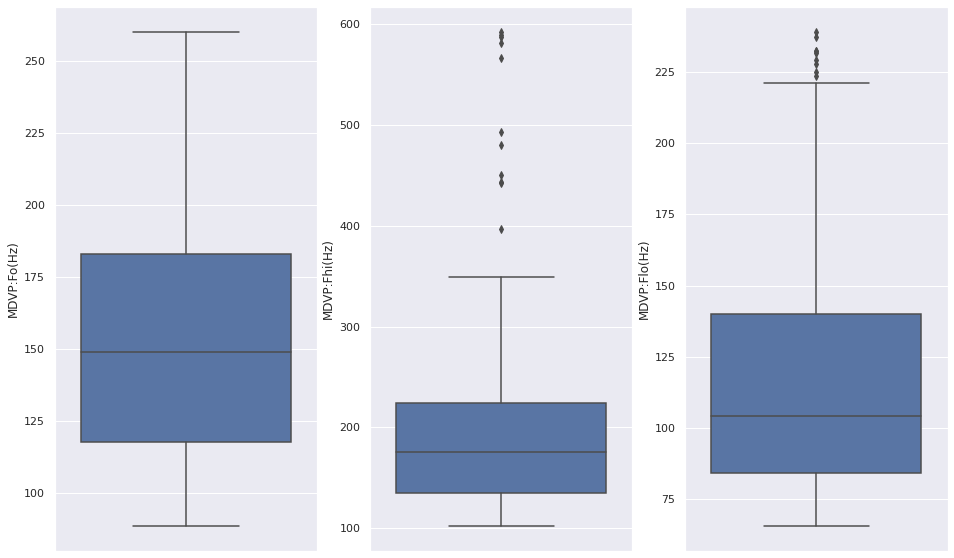

In [14]:
#EDA 2: Outliar Detection leveraging Box Plot
fig, ax = plt.subplots(1,3,figsize=(16,10)) 
sns.boxplot(x=Atr1g2,data=udata, ax=ax[0],orient='v') 
sns.boxplot(x=Atr2g2,data=udata, ax=ax[1],orient='v')
sns.boxplot(x=Atr3g2,data=udata,ax=ax[2],orient='v')

1. From the box plot above it appears that all the 3 attributes have skewness to the right. 
2. There are outliars for attribute MDVP:Fhi(Hz) and MDVP:Flo(Hz) <br>
Lets compute skewness

In [15]:
#EDA 3: Skewness check
Atr1g2_skew=round(stats.skew(udata[Atr1g2]),4)
Atr2g2_skew=round(stats.skew(udata[Atr2g2]),4)
Atr3g2_skew=round(stats.skew(udata[Atr3g2]),4)

print(' The skewness of',Atr1g2,'is', Atr1g2_skew)
print(' The skewness of',Atr2g2,'is', Atr2g2_skew)
print(' The skewness of',Atr3g2,'is', Atr3g2_skew)

 The skewness of MDVP:Fo(Hz) is 0.5872
 The skewness of MDVP:Fhi(Hz) is 2.5225
 The skewness of MDVP:Flo(Hz) is 1.208


Clearly all 3 attributes have skewness with attribute MDVP:Fo(Hz) having the highest skewness

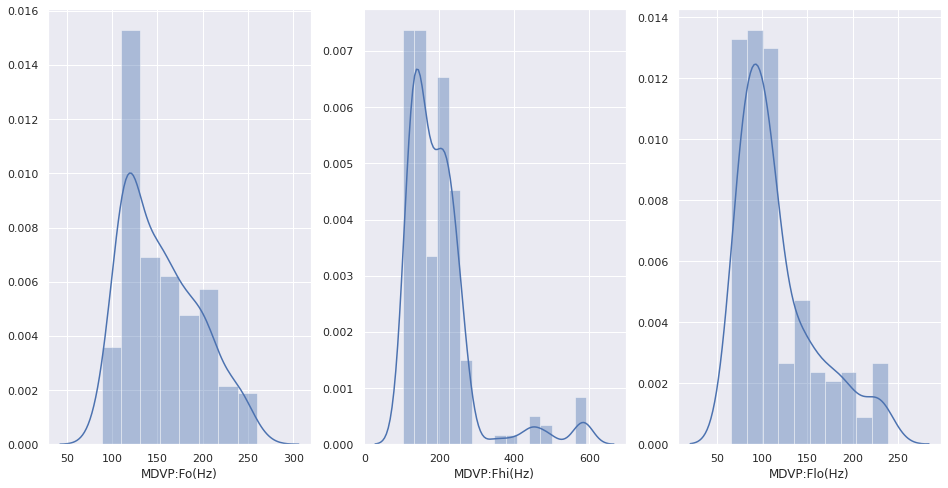

In [16]:
##EDA 4: Spread
fig, ax = plt.subplots(1,3,figsize=(16,8)) 
sns.distplot(udata[Atr1g2],ax=ax[0]) 
sns.distplot(udata[Atr2g2],ax=ax[1]) 
sns.distplot(udata[Atr3g2],ax=ax[2])

The plots above represents the 3 measures of the vocal fundamental frequency. The skewness is also evident from the plots. <br>
Peak frequencies are noticed between 75 and 125 for Average vocal frequency (MDVP:Flo(Hz)); at 125 for Maximum vocal frequency (MDVP:Fo(Hz)); 
For High vocal frequency, the peak seems to happen at 150; there are also some value at the right most tail

In [17]:
##EDA 5: Correlation of attributes of group 2 with other attributes.
corr_atr1g2=udata[udata.columns].corr()[Atr1g2][:]
corr_atr2g2=udata[udata.columns].corr()[Atr2g2][:]
corr_atr3g2=udata[udata.columns].corr()[Atr3g2][:]
pd.concat([round(corr_atr1g2,4),round(corr_atr2g2,4),round(corr_atr3g2,4)],axis=1,sort=False).T

# pd.DataFrame(round(corr,4)).T

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)        1.0000         0.401        0.5965         -0.1180   
MDVP:Fhi(Hz)       0.4010         1.000        0.0850          0.1021   
MDVP:Flo(Hz)       0.5965         0.085        1.0000         -0.1399   

              MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
MDVP:Fo(Hz)            -0.3820   -0.0762   -0.1122     -0.0762       -0.0984   
MDVP:Fhi(Hz)           -0.0292    0.0972    0.0911      0.0971        0.0023   
MDVP:Flo(Hz)           -0.2778   -0.1005   -0.0958     -0.1005       -0.1445   

              MDVP:Shimmer(dB)  ...  Shimmer:DDA     NHR     HNR  status  \
MDVP:Fo(Hz)            -0.0737  ...      -0.0947 -0.0220  0.0591 -0.3835   
MDVP:Fhi(Hz)            0.0435  ...      -0.0037  0.1638 -0.0249 -0.1661   
MDVP:Flo(Hz)           -0.1191  ...      -0.1507 -0.1087  0.2109 -0.3802   

                RPDE     DFA  spread1  spread2      D2     PPE  
MDVP:Fo(Hz)  -0.3839 -0.4460  -0.4137  -0.2495  0.1780 -0.3724  
MDVP:Fhi(Hz) -0.1124 -0.3431  -0.0767  -0.0030  0.1763 -0.0695  
MDVP:Flo(Hz) -0.4001 -0.0504  -0.3949  -0.2438 -0.1006 -0.3401  

[3 rows x 23 columns]

1. MDVP:Fo(Hz) 
    - which is Average vocal fundamental frequency has some correlation with MDVP:Fhi(Hz) - Maximum vocal fundamental frequency and MDVP:Flo(Hz) - Minimum vocal fundamental frequency. All 3 of them are measures of vocal fundamental frequency. 
    - Apart from Maximum and minimum vocal fundamenta frequency Average vocal fundamental frequency doesnt seem to have any correlation with any other attribute. <br><br>

2. MDVP:Fhi(Hz)
    - which is maximum vocal fundamental frequency has some correlation with MDVP:Fo(Hz) - Average vocal fundamental frequency.
    - Apart from Maximum and minimum vocal fundamenta frequency Average vocal fundamental frequency doesnt seem to have any correlation with any other attribute.<br><br>

2. MDVP:Flo(Hz)
    - which is minimum vocal fundamental frequency has some correlation with MDVP:Fo(Hz) - Average vocal fundamental frequency.
    - Apart from Maximum and minimum vocal fundamenta frequency Average vocal fundamental frequency doesnt seem to have any correlation with any other attribute.


<font color='blue'> __Attribute Group 3 - MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP :__  </font> From the data description section (step 2.5) which captures basic statistical information, it appear that all the attributes of group 3 have right skewness; given that mean is greater than median. Lets perform EDA on Group 3.

In [18]:
# Attributes in the Group
Atr1g3='MDVP:Jitter(%)'
Atr2g3='MDVP:Jitter(Abs)'
Atr3g3='MDVP:RAP'
Atr4g3='MDVP:PPQ'
Atr5g3='Jitter:DDP'

In [19]:
#EDA 1: 5 point summary to understand spread
Atr1g3_5pt=udata.describe().loc[['min','25%','50%','75%','max'],[Atr1g3]]
Atr2g3_5pt=udata.describe().loc[['min','25%','50%','75%','max'],[Atr2g3]]
Atr3g3_5pt=udata.describe().loc[['min','25%','50%','75%','max'],[Atr3g3]]
Atr4g3_5pt=udata.describe().loc[['min','25%','50%','75%','max'],[Atr4g3]]
Atr5g3_5pt=udata.describe().loc[['min','25%','50%','75%','max'],[Atr5g3]]

summ_g3 = pd.concat([Atr1g3_5pt,Atr2g3_5pt,Atr3g3_5pt,Atr4g3_5pt,Atr5g3_5pt],axis=1,sort=False)

print('The 5 point summary of attributes in group 3 are:','\n','\n',summ_g3)

The 5 point summary of attributes in group 3 are: 
 
      MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP
min        0.001680          0.000007  0.000680  0.000920    0.002040
25%        0.003460          0.000020  0.001660  0.001860    0.004985
50%        0.004940          0.000030  0.002500  0.002690    0.007490
75%        0.007365          0.000060  0.003835  0.003955    0.011505
max        0.033160          0.000260  0.021440  0.019580    0.064330


From the 5 point summary above: <br>
1. MDVP:Jitter(%): 
    - The range of MDVP:Jitter(%) is [0.0016, 0.0332] with a median of 0.0049. The mean (from section2.5) is sligtly more than median which means that there could be slight skewness on the right.
    - There appear to be certain outliars on the right. we will plot a box plot to confirm the same. <br><br>

2. MDVP:Jitter(Abs): 
    - The range of MDVP:Jitter(Abs) is [0.000007, 0.000260] with a median of 0.000030. The mean (from section2.5) is more than median which means that there could be skewness on the right.
    - There might be potential outliars which we will identify by plotting a box plot.<br><br>

3. MDVP:RAP: 
    - The range of MDVP:RAP is [0.000680,0.021440] with a median of 0.002500. The mean (from section2.5) is more than median which means that there could be skewness on the right.
    - There might be potential outliars which we will identify by plotting a box plot.<br><br>
    
4. MDVP:PPQ: 
    - The range of MDVP:PPQ is [0.000920,0.019580] with a median of 0.002690. The mean (from section2.5) is more than median which means that there could be skewness on the right.
    - There might be potential outliars which we will identify by plotting a box plot.<br><br>

5. Jitter:DDP: 
    - The range of Jitter:DDP is [0.002040,0.064330] with a median of 0.007490. The mean (from section2.5) is more than median which means that there could be skewness on the right.
    - There might be potential outliars which we will identify by plotting a box plot.<br><br>

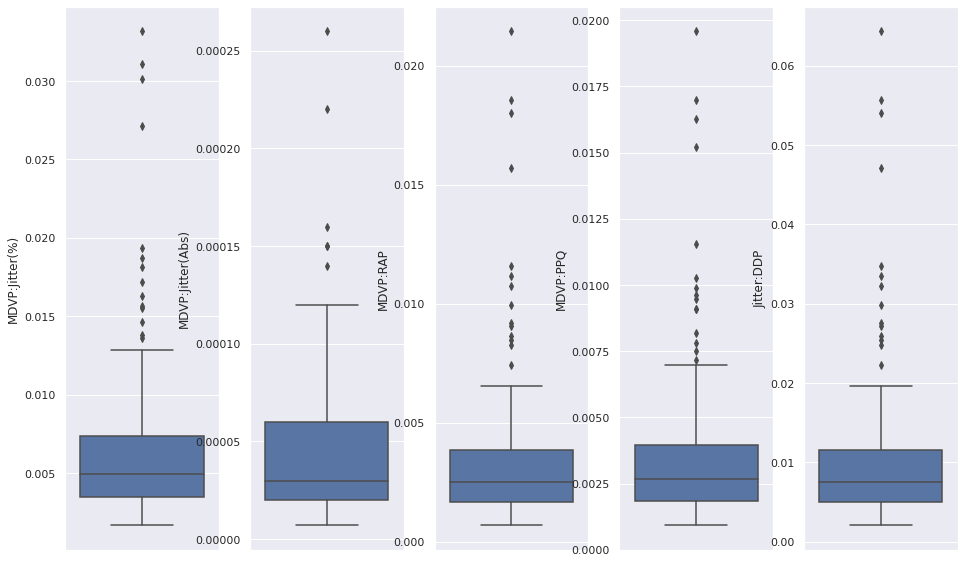

In [20]:
#EDA 2: Outliar Detection leveraging Box Plot
fig, ax = plt.subplots(1,5,figsize=(16,10)) 
sns.boxplot(x=Atr1g3,data=udata, ax=ax[0],orient='v') 
sns.boxplot(x=Atr2g3,data=udata, ax=ax[1],orient='v')
sns.boxplot(x=Atr3g3,data=udata,ax=ax[2],orient='v')
sns.boxplot(x=Atr4g3,data=udata,ax=ax[3],orient='v')
sns.boxplot(x=Atr5g3,data=udata,ax=ax[4],orient='v')

1. From the box plot above it appears that all the 5 attributes have skewness to the right. We'll compute the skewness in the next section
2. There are outliars in all the attributes <br>

In [21]:
#EDA 3: Skewness check
Atr1g3_skew=round(stats.skew(udata[Atr1g3]),4)
Atr2g3_skew=round(stats.skew(udata[Atr2g3]),4)
Atr3g3_skew=round(stats.skew(udata[Atr3g3]),4)
Atr4g3_skew=round(stats.skew(udata[Atr4g3]),4)
Atr5g3_skew=round(stats.skew(udata[Atr5g3]),4)

print(' The skewness of',Atr1g3,'is', Atr1g3_skew)
print(' The skewness of',Atr2g3,'is', Atr2g3_skew)
print(' The skewness of',Atr3g3,'is', Atr3g3_skew)
print(' The skewness of',Atr4g3,'is', Atr4g3_skew)
print(' The skewness of',Atr5g3,'is', Atr5g3_skew)

 The skewness of MDVP:Jitter(%) is 3.0612
 The skewness of MDVP:Jitter(Abs) is 2.6287
 The skewness of MDVP:RAP is 3.3348
 The skewness of MDVP:PPQ is 3.0502
 The skewness of Jitter:DDP is 3.3361


Clearly all 5 attributes have skewness with attribute Jitter:DDP and MDVP:RAP having the highest skewness

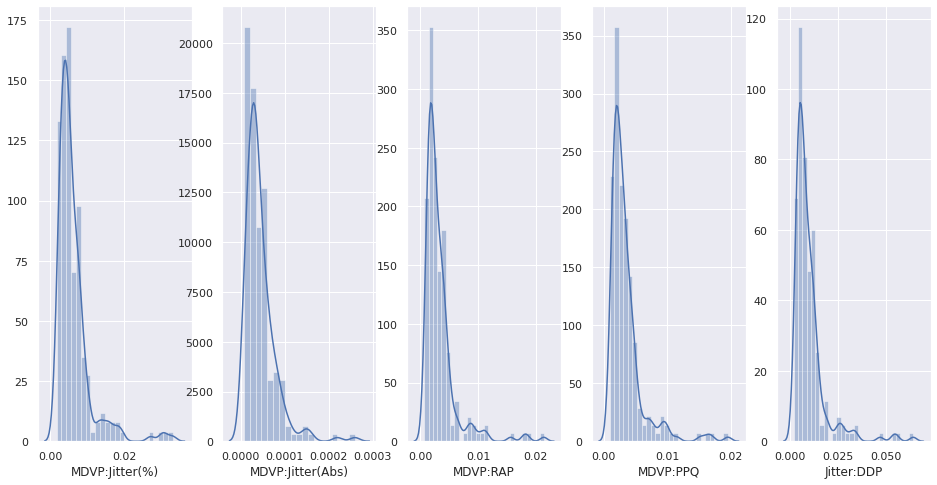

In [22]:
##EDA 4: Spread
fig, ax = plt.subplots(1,5,figsize=(16,8)) 
sns.distplot(udata[Atr1g3],ax=ax[0]) 
sns.distplot(udata[Atr2g3],ax=ax[1]) 
sns.distplot(udata[Atr3g3],ax=ax[2])
sns.distplot(udata[Atr4g3],ax=ax[3])
sns.distplot(udata[Atr5g3],ax=ax[4])

The plots above represents the Several measures of variation in fundamental frequency. Right skewness is also evident from the plots. <br>

In [23]:
##EDA 5: Correlation of attributes of group 3 with other attributes.
corr_atr1g3=udata[udata.columns].corr()[Atr1g3][:]
corr_atr2g3=udata[udata.columns].corr()[Atr2g3][:]
corr_atr3g3=udata[udata.columns].corr()[Atr3g3][:]
corr_atr4g3=udata[udata.columns].corr()[Atr4g3][:]
corr_atr5g3=udata[udata.columns].corr()[Atr5g3][:]
pd.concat([round(corr_atr1g3,4),round(corr_atr2g3,4),round(corr_atr3g3,4),round(corr_atr4g3,4),round(corr_atr5g3,4)],axis=1,sort=False).T

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Jitter(%)        -0.1180        0.1021       -0.1399          1.0000   
MDVP:Jitter(Abs)      -0.3820       -0.0292       -0.2778          0.9357   
MDVP:RAP              -0.0762        0.0972       -0.1005          0.9903   
MDVP:PPQ              -0.1122        0.0911       -0.0958          0.9743   
Jitter:DDP            -0.0762        0.0971       -0.1005          0.9903   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Jitter(%)              0.9357    0.9903    0.9743      0.9903   
MDVP:Jitter(Abs)            1.0000    0.9229    0.8978      0.9229   
MDVP:RAP                    0.9229    1.0000    0.9573      1.0000   
MDVP:PPQ                    0.8978    0.9573    1.0000      0.9573   
Jitter:DDP                  0.9229    1.0000    0.9573      1.0000   

                  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  Shimmer:DDA     NHR  \
MDVP:Jitter(%)          0.7691            0.8043  ...       0.7466  0.9070   
MDVP:Jitter(Abs)        0.7033            0.7166  ...       0.6972  0.8350   
MDVP:RAP                0.7596            0.7907  ...       0.7449  0.9195   
MDVP:PPQ                0.7978            0.8392  ...       0.7636  0.8446   
Jitter:DDP              0.7596            0.7906  ...       0.7449  0.9195   

                     HNR  status    RPDE     DFA  spread1  spread2      D2  \
MDVP:Jitter(%)   -0.7282  0.2782  0.3607  0.0986   0.6936   0.3851  0.4334   
MDVP:Jitter(Abs) -0.6568  0.3387  0.4418  0.1750   0.7358   0.3885  0.3107   
MDVP:RAP         -0.7215  0.2667  0.3421  0.0641   0.6483   0.3244  0.4266   
MDVP:PPQ         -0.7315  0.2887  0.3333  0.1963   0.7165   0.4076  0.4125   
Jitter:DDP       -0.7215  0.2666  0.3421  0.0640   0.6483   0.3244  0.4266   

                     PPE  
MDVP:Jitter(%)    0.7215  
MDVP:Jitter(Abs)  0.7482  
MDVP:RAP          0.6710  
MDVP:PPQ          0.7696  
Jitter:DDP        0.6710  

[5 rows x 23 columns]

While all the 5 measure of variation in fundamental frequency have low correlation with the measure of Vocal fundamental frequency; <br> 
However, they seem to have high correlation with almost of all the other attributes. <br> This raises concerns about the possibility of existence of multi-collinearity in the data. We will check and remediate multi-collinearity in the subsequent sections

<font color='blue'> __Attribute Group 4 - MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA:__  </font> From the data description section (step 2.5) which captures basic statistical information, it appear that all the attributes of group 4 have right skewness; given that __mean is greater than median __. Lets perform EDA on Group 4.

In [24]:
# Attributes in the Group
Atr1g4='MDVP:Shimmer'
Atr2g4='MDVP:Shimmer(dB)'
Atr3g4='Shimmer:APQ3'
Atr4g4='Shimmer:APQ5'
Atr5g4='MDVP:APQ'
Atr6g4='Shimmer:DDA'

In [25]:
#EDA 1: 5 point summary to understand spread
Atr1g4_5pt=udata.describe().loc[['min','25%','50%','75%','max'],[Atr1g4]]
Atr2g4_5pt=udata.describe().loc[['min','25%','50%','75%','max'],[Atr2g4]]
Atr3g4_5pt=udata.describe().loc[['min','25%','50%','75%','max'],[Atr3g4]]
Atr4g4_5pt=udata.describe().loc[['min','25%','50%','75%','max'],[Atr4g4]]
Atr5g4_5pt=udata.describe().loc[['min','25%','50%','75%','max'],[Atr5g4]]
Atr6g4_5pt=udata.describe().loc[['min','25%','50%','75%','max'],[Atr6g4]]

summ_g4 = pd.concat([Atr1g4_5pt,Atr2g4_5pt,Atr3g4_5pt,Atr4g4_5pt,Atr5g4_5pt,Atr6g4_5pt],axis=1,sort=False)

print('The 5 point summary of attributes in group 4 are:','\n','\n',summ_g4)

The 5 point summary of attributes in group 4 are: 
 
      MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  \
min      0.009540            0.0850      0.004550       0.00570   0.00719   
25%      0.016505            0.1485      0.008245       0.00958   0.01308   
50%      0.022970            0.2210      0.012790       0.01347   0.01826   
75%      0.037885            0.3500      0.020265       0.02238   0.02940   
max      0.119080            1.3020      0.056470       0.07940   0.13778   

     Shimmer:DDA  
min     0.013640  
25%     0.024735  
50%     0.038360  
75%     0.060795  
max     0.169420  


From the 5 point summary above: <br>
1. MDVP:Shimmer(%): 
    - The range of MDVP:Shimmer(%) is [0.009540, 0.119080] with a median of 0.022970. The mean (from section2.5) is sligtly more than median which means that there could be slight skewness on the right.
    - There appear to be certain outliars on the right. we will plot a box plot to confirm the same. <br><br>

2. MDVP:Shimmer(dB): 
    - The range of MDVP:Shimmer(dB) is [0.085000, 1.302000] with a median of 0.221000. The mean (from section2.5) is more than median which means that there could be skewness on the right.
    - There might be potential outliars which we will identify by plotting a box plot.<br><br>

3. Shimmer:APQ3: 
    - The range of Shimmer:APQ3 is [0.004550,0.056470] with a median of 0.012790. The mean (from section2.5) is more than median which means that there could be skewness on the right.
    - There might be potential outliars which we will identify by plotting a box plot.<br><br>
    
4. Shimmer:APQ5: 
    - The range of Shimmer:APQ5 is [0.005700,0.079400] with a median of 0.013470. The mean (from section2.5) is more than median which means that there could be skewness on the right.
    - There might be potential outliars which we will identify by plotting a box plot.<br><br>

5. MDVP:APQ: 
    - The range of MDVP:APQ is [0.007190,0.137780] with a median of 0.018260. The mean (from section2.5) is more than median which means that there could be skewness on the right.
    - There might be potential outliars which we will identify by plotting a box plot.<br><br>

6. Shimmer:DDA: 
    - The range of Shimmer:DDA is [0.013640,0.169420] with a median of 0.038360. The mean (from section2.5) is more than median which means that there could be skewness on the right.
    - There might be potential outliars which we will identify by plotting a box plot.<br><br>

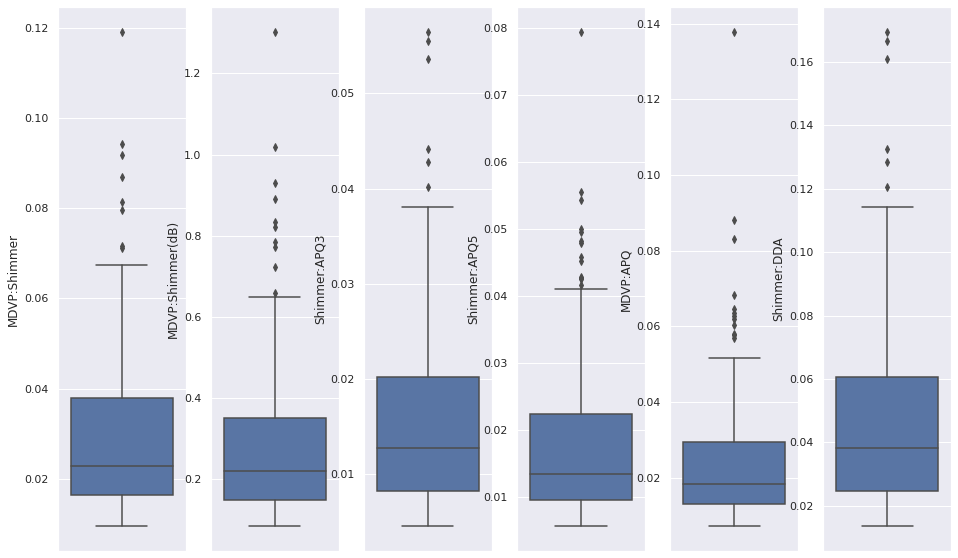

In [26]:
#EDA 2: Outliar Detection leveraging Box Plot
fig, ax = plt.subplots(1,6,figsize=(16,10)) 
sns.boxplot(x=Atr1g4,data=udata, ax=ax[0],orient='v') 
sns.boxplot(x=Atr2g4,data=udata, ax=ax[1],orient='v')
sns.boxplot(x=Atr3g4,data=udata,ax=ax[2],orient='v')
sns.boxplot(x=Atr4g4,data=udata,ax=ax[3],orient='v')
sns.boxplot(x=Atr5g4,data=udata,ax=ax[4],orient='v')
sns.boxplot(x=Atr6g4,data=udata,ax=ax[5],orient='v')

1. From the box plot above it appears that all the 6 attributes have skewness to the right. We'll compute the skewness in the next section
2. There are outliars in all the attributes <br>

In [27]:
#EDA 3: Skewness check
Atr1g4_skew=round(stats.skew(udata[Atr1g4]),4)
Atr2g4_skew=round(stats.skew(udata[Atr2g4]),4)
Atr3g4_skew=round(stats.skew(udata[Atr3g4]),4)
Atr4g4_skew=round(stats.skew(udata[Atr4g4]),4)
Atr5g4_skew=round(stats.skew(udata[Atr5g4]),4)
Atr6g4_skew=round(stats.skew(udata[Atr6g4]),4)

print(' The skewness of',Atr1g4,'is', Atr1g4_skew)
print(' The skewness of',Atr2g4,'is', Atr2g4_skew)
print(' The skewness of',Atr3g4,'is', Atr3g4_skew)
print(' The skewness of',Atr4g4,'is', Atr4g4_skew)
print(' The skewness of',Atr5g4,'is', Atr5g4_skew)
print(' The skewness of',Atr6g4,'is', Atr6g4_skew)

 The skewness of MDVP:Shimmer is 1.6536
 The skewness of MDVP:Shimmer(dB) is 1.984
 The skewness of Shimmer:APQ3 is 1.5684
 The skewness of Shimmer:APQ5 is 1.7848
 The skewness of MDVP:APQ is 2.5979
 The skewness of Shimmer:DDA is 1.5684


Clearly all 6 attributes have skewness with attribute MDVP:APQ having the highest skewness

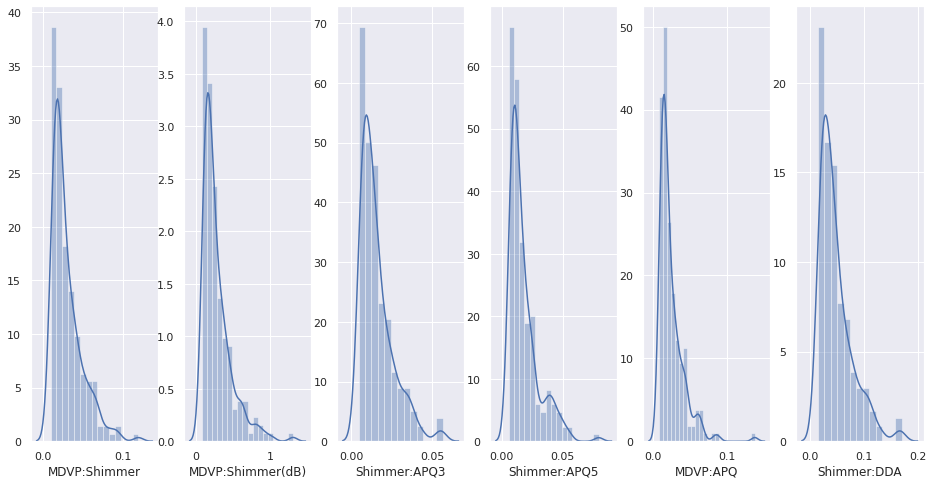

In [28]:
##EDA 4: Spread
fig, ax = plt.subplots(1,6,figsize=(16,8)) 
sns.distplot(udata[Atr1g4],ax=ax[0]) 
sns.distplot(udata[Atr2g4],ax=ax[1]) 
sns.distplot(udata[Atr3g4],ax=ax[2])
sns.distplot(udata[Atr4g4],ax=ax[3])
sns.distplot(udata[Atr5g4],ax=ax[4])
sns.distplot(udata[Atr6g4],ax=ax[5])

The plots above represents the Several measures of variation in amplitude. Right skewness is also evident from the plots. <br>

In [29]:
##EDA 5: Correlation of attributes of group 4 with other attributes.
corr_atr1g4=udata[udata.columns].corr()[Atr1g4][:]
corr_atr2g4=udata[udata.columns].corr()[Atr2g4][:]
corr_atr3g4=udata[udata.columns].corr()[Atr3g4][:]
corr_atr4g4=udata[udata.columns].corr()[Atr4g4][:]
corr_atr5g4=udata[udata.columns].corr()[Atr5g4][:]
corr_atr6g4=udata[udata.columns].corr()[Atr6g4][:]
pd.concat([round(corr_atr1g4,4),round(corr_atr2g4,4),round(corr_atr3g4,4),round(corr_atr4g4,4),round(corr_atr5g4,4),round(corr_atr5g4,4)],axis=1,sort=False).T

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Shimmer          -0.0984        0.0023       -0.1445          0.7691   
MDVP:Shimmer(dB)      -0.0737        0.0435       -0.1191          0.8043   
Shimmer:APQ3          -0.0947       -0.0037       -0.1507          0.7466   
Shimmer:APQ5          -0.0707       -0.0100       -0.1011          0.7256   
MDVP:APQ              -0.0778        0.0049       -0.1073          0.7583   
MDVP:APQ              -0.0778        0.0049       -0.1073          0.7583   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Shimmer                0.7033    0.7596    0.7978      0.7596   
MDVP:Shimmer(dB)            0.7166    0.7907    0.8392      0.7906   
Shimmer:APQ3                0.6972    0.7449    0.7636      0.7449   
Shimmer:APQ5                0.6490    0.7099    0.7868      0.7099   
MDVP:APQ                    0.6488    0.7375    0.8041      0.7374   
MDVP:APQ                    0.6488    0.7375    0.8041      0.7374   

                  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  Shimmer:DDA     NHR  \
MDVP:Shimmer            1.0000            0.9873  ...       0.9876  0.7222   
MDVP:Shimmer(dB)        0.9873            1.0000  ...       0.9632  0.7445   
Shimmer:APQ3            0.9876            0.9632  ...       1.0000  0.7162   
Shimmer:APQ5            0.9828            0.9738  ...       0.9601  0.6581   
MDVP:APQ                0.9501            0.9610  ...       0.8966  0.6940   
MDVP:APQ                0.9501            0.9610  ...       0.8966  0.6940   

                     HNR  status    RPDE     DFA  spread1  spread2      D2  \
MDVP:Shimmer     -0.8353  0.3674  0.4474  0.1600   0.6547   0.4520  0.5071   
MDVP:Shimmer(dB) -0.8278  0.3507  0.4107  0.1652   0.6525   0.4543  0.5122   
Shimmer:APQ3     -0.8271  0.3476  0.4352  0.1511   0.6110   0.4022  0.4673   
Shimmer:APQ5     -0.8138  0.3511  0.3999  0.2139   0.6468   0.4572  0.5022   
MDVP:APQ         -0.8004  0.3643  0.4514  0.1573   0.6732   0.5022  0.5369   
MDVP:APQ         -0.8004  0.3643  0.4514  0.1573   0.6732   0.5022  0.5369   

                     PPE  
MDVP:Shimmer      0.6938  
MDVP:Shimmer(dB)  0.6951  
Shimmer:APQ3      0.6454  
Shimmer:APQ5      0.7025  
MDVP:APQ          0.7217  
MDVP:APQ          0.7217  

[6 rows x 23 columns]

While all the 6 measure of variation in amplitude have low correlation with the measure of Vocal fundamental frequency; <br> 
However, they seem to have high correlation with almost of all the other attributes. <br> As high lighted while performing EDA for group 3, for group 4 as well, there seems to be the possibility of existence of multi-collinearity in the data. We will check and remediate multi-collinearity in the subsequent sections

<font color='blue'> __Attribute Group 5 - NHR,HNR:__  </font> From the data description section (step 2.5) which captures basic statistical information, it appear that while NHR has right skewness; given that mean is greater than median. However, HNR has left skewness; given that mean is less than median. Lets perform EDA on Group 5.

In [30]:
# Attributes in the Group
Atr1g5='NHR'
Atr2g5='HNR'

In [31]:
#EDA 1: 5 point summary to understand spread
Atr1g5_5pt=udata.describe().loc[['min','25%','50%','75%','max'],[Atr1g5]]
Atr2g5_5pt=udata.describe().loc[['min','25%','50%','75%','max'],[Atr2g5]]

summ_g5 = pd.concat([Atr1g5_5pt,Atr2g5_5pt],axis=1,sort=False)

print('The 5 point summary of attributes in group 5 are:','\n','\n',summ_g5)

The 5 point summary of attributes in group 5 are: 
 
           NHR      HNR
min  0.000650   8.4410
25%  0.005925  19.1980
50%  0.011660  22.0850
75%  0.025640  25.0755
max  0.314820  33.0470


From the 5 point summary above: <br>
1. NHR: 
    - The range of NHR is [0.000650,0.314820] with a median of 0.011660. The mean (from section2.5) is more than median which means that there could be slight skewness on the right.
    - There appear to be certain outliars on the right. we will plot a box plot to confirm the same. <br><br>

2. HNR: 
    - The range of HNR is [8.441000,33.047000] with a median of 22.085000. The mean (from section2.5) is less than median which means that there could be skewness on the left.
    - There might be potential outliars which we will identify by plotting a box plot.<br><br>

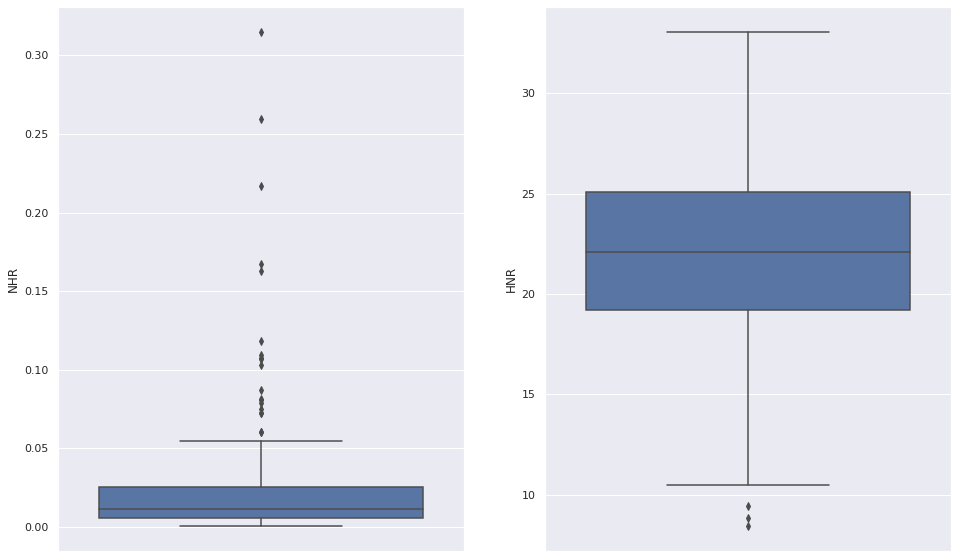

In [32]:
#EDA 2: Outliar Detection leveraging Box Plot
fig, ax = plt.subplots(1,2,figsize=(16,10)) 
sns.boxplot(x=Atr1g5,data=udata, ax=ax[0],orient='v') 
sns.boxplot(x=Atr2g5,data=udata, ax=ax[1],orient='v')

1. From the box plot above it appears that while NHR is right skewed; HNR seems to have skewness towards the left. We'll compute the skewness in the next section
2. There are outliars in both the attributes <br>

In [33]:
#EDA 3: Skewness check
Atr1g5_skew=round(stats.skew(udata[Atr1g5]),4)
Atr2g5_skew=round(stats.skew(udata[Atr2g5]),4)

print(' The skewness of',Atr1g5,'is', Atr1g5_skew)
print(' The skewness of',Atr2g5,'is', Atr2g5_skew)


 The skewness of NHR is 4.1882
 The skewness of HNR is -0.5104


Clearly both the attributes have skewness. While NHR has positive skewness indicating that the skewness is on the right. HNR has slight negative skewness indicating that the skewness is on the left.

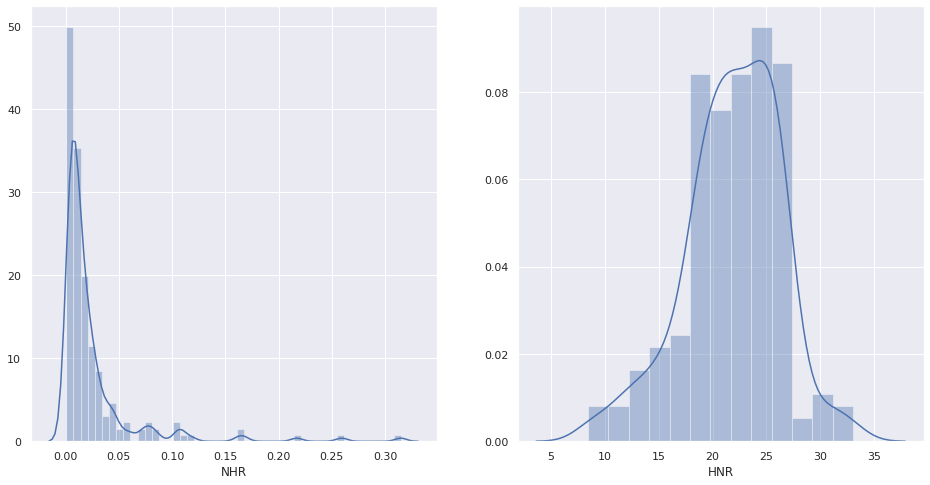

In [34]:
##EDA 4: Spread
fig, ax = plt.subplots(1,2,figsize=(16,8)) 
sns.distplot(udata[Atr1g5],ax=ax[0]) 
sns.distplot(udata[Atr2g5],ax=ax[1]) 

The plots above represents the Two measures of ratio of noise to tonal components in the voice. Right skewness for NHR and left skewness for HNR is also evident from the plots. <br>

In [35]:
##EDA 5: Correlation of attributes of group 5 with other attributes.
corr_atr1g5=udata[udata.columns].corr()[Atr1g5][:]
corr_atr2g5=udata[udata.columns].corr()[Atr2g5][:]
pd.concat([round(corr_atr1g5,4),round(corr_atr2g5,4)],axis=1,sort=False).T

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
NHR      -0.0220        0.1638       -0.1087          0.9070   
HNR       0.0591       -0.0249        0.2109         -0.7282   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
NHR            0.8350    0.9195    0.8446      0.9195        0.7222   
HNR           -0.6568   -0.7215   -0.7315     -0.7215       -0.8353   

     MDVP:Shimmer(dB)  ...  Shimmer:DDA     NHR     HNR  status    RPDE  \
NHR            0.7445  ...       0.7162  1.0000 -0.7141  0.1894  0.3709   
HNR           -0.8278  ...      -0.8271 -0.7141  1.0000 -0.3615 -0.5987   

        DFA  spread1  spread2      D2     PPE  
NHR -0.1319   0.5409   0.3181  0.4709  0.5526  
HNR -0.0087  -0.6732  -0.4316 -0.6014 -0.6929  

[2 rows x 23 columns]

While both the measures of ratio of noise to tonal components in the voice have low correlation with the measure of Vocal fundamental frequency; <br> 
However, they seem to have high correlation with most of all the other attributes. <br> As highlighted while performing EDA for group 3 and group 4, for group 5 as well, there seems to be the possibility of existence of multi-collinearity in the data. We will check and remediate multi-collinearity in the subsequent sections

<font color='blue'> __Attribute Group 7 RPDE,D2:__  </font> From the data description section (step 2.5) which captures basic statistical information, it appear that mean and median are close to each other; hence it seems that the attributes have minimal skewness. Lets perform EDA on Group 7.

In [36]:
# Attributes in the Group
Atr1g7='RPDE'
Atr2g7='D2'

In [37]:
#EDA 1: 5 point summary to understand spread
Atr1g7_5pt=udata.describe().loc[['min','25%','50%','75%','max'],[Atr1g7]]
Atr2g7_5pt=udata.describe().loc[['min','25%','50%','75%','max'],[Atr2g7]]

summ_g7 = pd.concat([Atr1g7_5pt,Atr2g7_5pt],axis=1,sort=False)

print('The 5 point summary of attributes in group 7 are:','\n','\n',summ_g7)

The 5 point summary of attributes in group 7 are: 
 
          RPDE        D2
min  0.256570  1.423287
25%  0.421306  2.099125
50%  0.495954  2.361532
75%  0.587562  2.636456
max  0.685151  3.671155


From the 5 point summary above: <br>
1. RPDE: 
    - The range of RPDE is [0.256570,0.685151] with a median of 0.495954. The mean (from section2.5) is close to median which means that there is negligible skewness.
    - There doesnt seem to be any outliars. We will plot a box plot to confirm the same. <br><br>

2. D2: 
    - The range of D2 is [1.423287,3.671155] with a median of 2.361532. The mean (from section2.5) is close to median which means that there is negligible skewness.
    - There doesnt seem to be any outliars. We will plot a box plot to confirm the same. <br><br>

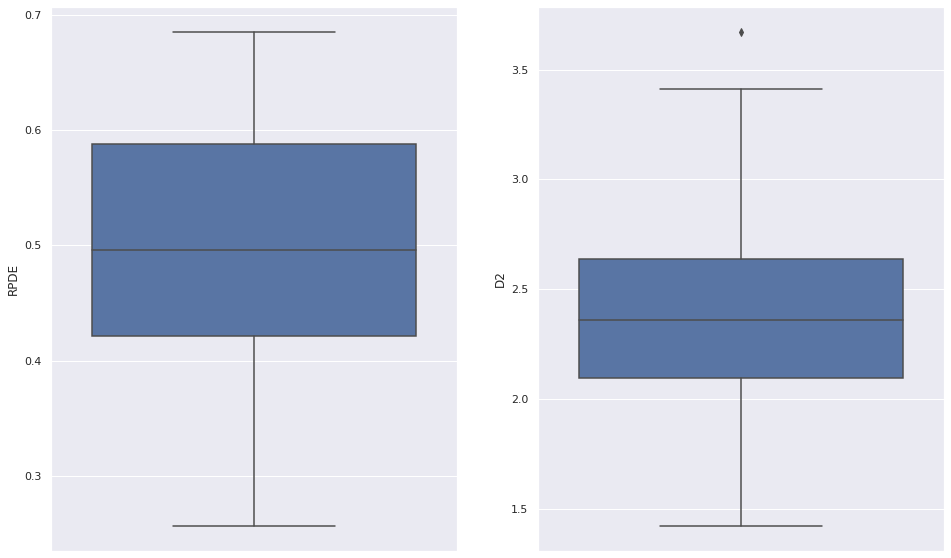

In [38]:
#EDA 2: Outliar Detection leveraging Box Plot
fig, ax = plt.subplots(1,2,figsize=(16,10)) 
sns.boxplot(x=Atr1g7,data=udata, ax=ax[0],orient='v') 
sns.boxplot(x=Atr2g7,data=udata, ax=ax[1],orient='v')

1. From the box plot above it appears that while RPDE has some left skewness; D2 has some skewness on the right. We'll compute the skewness in the next section
2. While RPDE doesnt have any outliars; There are outliars for D2 <br>

In [39]:
#EDA 3: Skewness check
Atr1g7_skew=round(stats.skew(udata[Atr1g7]),4)
Atr2g7_skew=round(stats.skew(udata[Atr2g7]),4)

print(' The skewness of',Atr1g7,'is', Atr1g7_skew)
print(' The skewness of',Atr2g7,'is', Atr2g7_skew)

 The skewness of RPDE is -0.1423
 The skewness of D2 is 0.4271


Clearly both the attributes have skewness. While D2 has positive skewness indicating that the skewness is on the right. RPDE has slight negative skewness indicating that the skewness is on the left.

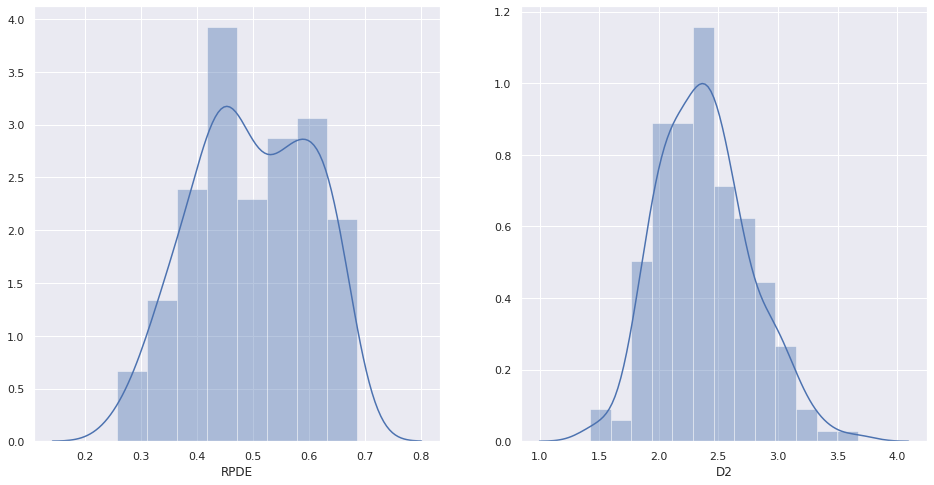

In [40]:
##EDA 4: Spread
fig, ax = plt.subplots(1,2,figsize=(16,8)) 
sns.distplot(udata[Atr1g7],ax=ax[0]) 
sns.distplot(udata[Atr2g7],ax=ax[1]) 

The plots above represents the Two nonlinear dynamical complexity measures. Left skewness for RPDE and right skewness for D2 is also evident from the plots. <br>

In [41]:
##EDA 5: Correlation of attributes of group 7 with other attributes.
corr_atr1g7=udata[udata.columns].corr()[Atr1g7][:]
corr_atr2g7=udata[udata.columns].corr()[Atr2g7][:]
pd.concat([round(corr_atr1g7,4),round(corr_atr2g7,4)],axis=1,sort=False).T

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
RPDE      -0.3839       -0.1124       -0.4001          0.3607   
D2         0.1780        0.1763       -0.1006          0.4334   

      MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
RPDE            0.4418    0.3421    0.3333      0.3421        0.4474   
D2              0.3107    0.4266    0.4125      0.4266        0.5071   

      MDVP:Shimmer(dB)  ...  Shimmer:DDA     NHR     HNR  status    RPDE  \
RPDE            0.4107  ...       0.4352  0.3709 -0.5987  0.3086  1.0000   
D2              0.5122  ...       0.4673  0.4709 -0.6014  0.3402  0.2369   

         DFA  spread1  spread2      D2     PPE  
RPDE -0.1109   0.5911   0.4799  0.2369  0.5459  
D2   -0.1654   0.4951   0.5235  1.0000  0.4806  

[2 rows x 23 columns]

Both the measures of nonlinear dynamical complexity seem to have some corelation most of all the other attributes. <br> As highlighted while performing EDA for group 3, group 4 and group 5, for Group 7 as well, there seems to be the possibility of existence of multi-collinearity in the data. We will check and remediate multi-collinearity in the subsequent sections

<font color='blue'> __Attribute Group 8 DFA:__  </font> From the data description section (step 2.5) which captures basic statistical information, it appear that mean and median are close to each other; hence it seems that the attributes have negligible skewness. Lets perform EDA on Group 8.

In [42]:
# Attributes in the Group
Atr1g8='DFA'

In [43]:
#EDA 1: 5 point summary to understand spread
Atr1g8_5pt=udata.describe().loc[['min','25%','50%','75%','max','mean'],[Atr1g8]]

print('The 5 point summary of attributes in group 7 are:','\n','\n',Atr1g8_5pt)

The 5 point summary of attributes in group 7 are: 
 
            DFA
min   0.574282
25%   0.674758
50%   0.722254
75%   0.761881
max   0.825288
mean  0.718099


From the 5 point summary above: <br>
1. DFA: 
    - The range of DFA is [0.574282,0.825288] with a median of 0.722254. The mean (from section2.5) is close to median which means that there is minimal skewness.
    - There doesnt seem to be any outliars. We will plot a box plot to confirm the same. <br><br>

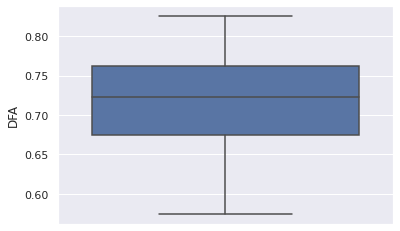

In [44]:
#EDA 2: Outliar Detection leveraging Box Plot
sns.boxplot(x=Atr1g8,data=udata,orient='v');

1. From the box plot above it appears that DFA has slight left skewness; We'll compute the skewness in the next section
2. There doesnt appear to be any outliars for DFA <br>

In [45]:
#EDA 3: Skewness check
Atr1g8_skew=round(stats.skew(udata[Atr1g8]),4)

print(' The skewness of',Atr1g8,'is', Atr1g8_skew)

 The skewness of DFA is -0.033


DFA has slight negative skewness.

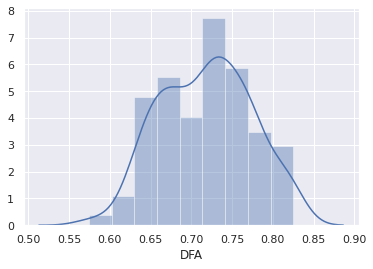

In [46]:
##EDA 4: Spread
sns.distplot(udata[Atr1g8]);

The plots above represents the spread of Signal fractal scaling exponents. As it is visible, there is slight Left skewness for DFA. <br>

In [47]:
##EDA 5: Correlation of attributes of group 8 with other attributes.
corr_atr1g8=udata[udata.columns].corr()[Atr1g8][:]
pd.DataFrame(round(corr_atr1g8,4)).T

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
DFA       -0.446       -0.3431       -0.0504          0.0986   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
DFA             0.175    0.0641    0.1963       0.064          0.16   

     MDVP:Shimmer(dB)  ...  Shimmer:DDA     NHR     HNR  status    RPDE  DFA  \
DFA            0.1652  ...       0.1511 -0.1319 -0.0087  0.2317 -0.1109  1.0   

     spread1  spread2      D2     PPE  
DFA   0.1957   0.1665 -0.1654  0.2704  

[1 rows x 23 columns]

Signal fractal scaling exponent seem to have some corelation with Average vocal fundamental frequency and maximum vocal fundamental frequency. Apart from these 2 attributes, DFA doesnt seem to have correlation with any other attribute. <br>

<font color='blue'> __Attribute Group 9: spread1, spread2, PPE:__  </font> From the data description section (step 2.5) which captures basic statistical information, it appear that for all the 3 attributes mean is slightly greater than median; hence it seems that the attributes have positive skewness. Lets perform EDA on Group 9.

In [48]:
# Attributes in the Group
Atr1g9='spread1'
Atr2g9='spread2'
Atr3g9='PPE'

In [49]:
#EDA 1: 5 point summary to understand spread
Atr1g9_5pt=udata.describe().loc[['min','25%','50%','75%','max'],[Atr1g9]]
Atr2g9_5pt=udata.describe().loc[['min','25%','50%','75%','max'],[Atr2g9]]
Atr3g9_5pt=udata.describe().loc[['min','25%','50%','75%','max'],[Atr3g9]]

summ_g9 = pd.concat([Atr1g9_5pt,Atr2g9_5pt,Atr3g9_5pt],axis=1,sort=False)

print('The 5 point summary of attributes in group 9 are:','\n','\n',summ_g9)

The 5 point summary of attributes in group 9 are: 
 
       spread1   spread2       PPE
min -7.964984  0.006274  0.044539
25% -6.450096  0.174351  0.137451
50% -5.720868  0.218885  0.194052
75% -5.046192  0.279234  0.252980
max -2.434031  0.450493  0.527367


From the 5 point summary above: <br>
1. spread1: 
    - The range of spread1 is [-7.964984,-2.434031] with a median of -5.720868. The mean (from section2.5) is close to median which means that there is some skewness.
    - There seem to be some outliars on the right hand side. We will plot a box plot to confirm the same. <br><br>

2. spread2: 
    - The range of spread2 is [0.006274,0.450493] with a median of 0.218885. The mean (from section2.5) is close to median which means that there is some skewness.
    - There seem to be some outliars. We will plot a box plot to confirm the same. <br><br>
    
2. PPE: 
    - The range of PPE is [0.044539,0.527367] with a median of 0.194052. The mean (from section2.5) is close to median which means that there is some skewness.
    - There seem to be some outliars on the right hand side. We will plot a box plot to confirm the same. <br><br>

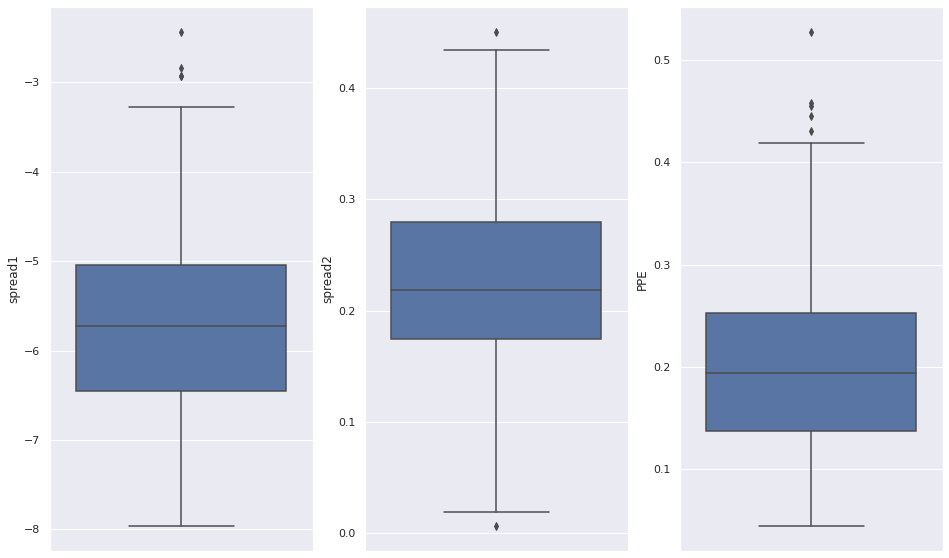

In [50]:
#EDA 2: Outliar Detection leveraging Box Plot
fig, ax = plt.subplots(1,3,figsize=(16,10)) 
sns.boxplot(x=Atr1g9,data=udata, ax=ax[0],orient='v') 
sns.boxplot(x=Atr2g9,data=udata, ax=ax[1],orient='v')
sns.boxplot(x=Atr3g9,data=udata, ax=ax[2],orient='v')

1. From the box plots above it appears that while all 3 attributes have positive skewness which means there is skewness on the right. We'll compute the skewness in the next section
2. All the 3 attributes have few outliars <br>

In [51]:
#EDA 3: Skewness check
Atr1g9_skew=round(stats.skew(udata[Atr1g9]),4)
Atr2g9_skew=round(stats.skew(udata[Atr2g9]),4)
Atr3g9_skew=round(stats.skew(udata[Atr3g9]),4)

print(' The skewness of',Atr1g9,'is', Atr1g9_skew)
print(' The skewness of',Atr2g9,'is', Atr2g9_skew)
print(' The skewness of',Atr3g9,'is', Atr3g9_skew)

 The skewness of spread1 is 0.4288
 The skewness of spread2 is 0.1433
 The skewness of PPE is 0.7913


Clearly all the attributes in this group have some positive skewness indicating that the skewness is on the right.

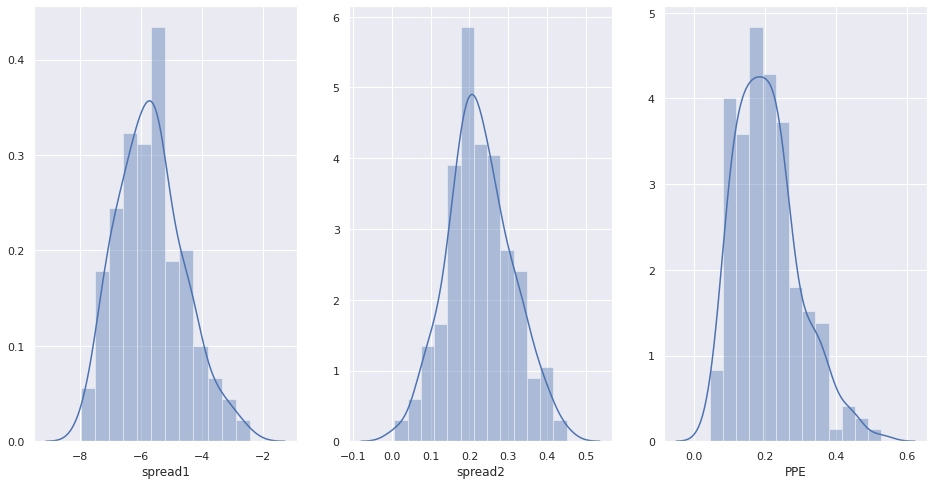

In [52]:
##EDA 4: Spread
fig, ax = plt.subplots(1,3,figsize=(16,8)) 
sns.distplot(udata[Atr1g9],ax=ax[0]) 
sns.distplot(udata[Atr2g9],ax=ax[1])
sns.distplot(udata[Atr3g9],ax=ax[2])

The plots above represents the Three nonlinear measures of fundamental frequency measures. As it can be seen there is slight right skewness in PPE and spread 1 <br>

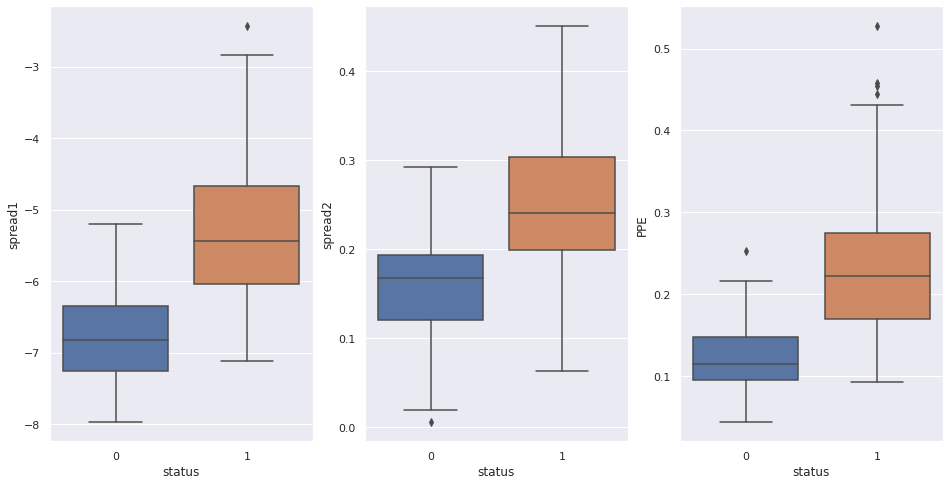

In [53]:
##EDA 5: Comparison of Three nonlinear measures of fundamental frequency between people having PD (status=1) and people not having PD (status=0).
fig, ax = plt.subplots(1,3,figsize=(16,8))
sns.boxplot(x='status',y=Atr1g9,data=udata,ax=ax[0])
sns.boxplot(x='status',y=Atr2g9,data=udata,ax=ax[1])
sns.boxplot(x='status',y=Atr3g9,data=udata,ax=ax[2])

Spread1
1. The range of variation is more for subjects having PD when compared to people not having PD.
2. There seem to be outliars for subjects with PD; where there doesnt seem to be any outliars for subjects who don't have PD <br>

Spread2 <br>

1. The range of variation is more for subjects having PD when compared to people not having PD.
2. There are outliars for subjects who dont have PD.

PPE <br>

1. The range of variation is more for subjects having PD when compared to people not having PD.
2. There are outliars for both the status. The outliars are on the right hand side.

In [54]:
##EDA 6: Correlation of attributes of group 9 with other attributes.
corr_atr1g9=udata[udata.columns].corr()[Atr1g9][:]
corr_atr2g9=udata[udata.columns].corr()[Atr2g9][:]
corr_atr3g9=udata[udata.columns].corr()[Atr3g9][:]
pd.concat([round(corr_atr1g9,4),round(corr_atr2g9,4),round(corr_atr3g9,4)],axis=1,sort=False).T

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
spread1      -0.4137       -0.0767       -0.3949          0.6936   
spread2      -0.2495       -0.0030       -0.2438          0.3851   
PPE          -0.3724       -0.0695       -0.3401          0.7215   

         MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
spread1            0.7358    0.6483    0.7165      0.6483        0.6547   
spread2            0.3885    0.3244    0.4076      0.3244        0.4520   
PPE                0.7482    0.6710    0.7696      0.6710        0.6938   

         MDVP:Shimmer(dB)  ...  Shimmer:DDA     NHR     HNR  status    RPDE  \
spread1            0.6525  ...       0.6110  0.5409 -0.6732  0.5648  0.5911   
spread2            0.4543  ...       0.4022  0.3181 -0.4316  0.4548  0.4799   
PPE                0.6951  ...       0.6454  0.5526 -0.6929  0.5310  0.5459   

            DFA  spread1  spread2      D2     PPE  
spread1  0.1957   1.0000   0.6524  0.4951  0.9624  
spread2  0.1665   0.6524   1.0000  0.5235  0.6447  
PPE      0.2704   0.9624   0.6447  0.4806  1.0000  

[3 rows x 23 columns]

spread1 and PPE seem to have correlation with most of other attributes. As highlighted earlier, we will check multi-collinearity in the data and try to remediate it.
spread2 seems to have some correlation with few of the variables. This will also become clear when compute multi-collinearity

<font color='blue'> __Attribute Group 6 - Status:__  </font> The target column i.e. Status is a categorical variable and has boolean values (0,1) which essentially captures the health status of the subject. A value of 1 indicates that the subject has PD and a value of 0 indicates that the subject doesnt have PD. Lets perform EDA on Group 6.

In [55]:
Atrg6='status'

In [56]:
# EDA 1: Count of subjects who had Parkinson Disease and subjects who did not have Parkinson Disease

udata_yPD= udata[udata[Atrg6]==1]
udata_nPD= udata[udata[Atrg6]==0]
num_yPD=udata[Atrg6][udata[Atrg6]==1].count()
num_nPD=udata[Atrg6][udata[Atrg6]==0].count()
print('The total number of subjects who have Parkinson Disease are',num_yPD,'which is',round(num_yPD/shape_data[0]*100,2),
      'percent of the total dataset.')
print('The total number of subjects who do not have Parkinson Disease are',num_nPD,'which is',round(num_nPD/shape_data[0]*100,2),
      'percent of the total dataset.')

The total number of subjects who have Parkinson Disease are 147 which is 75.38 percent of the total dataset.
The total number of subjects who do not have Parkinson Disease are 48 which is 24.62 percent of the total dataset.


Observation:
1. The number of subjects who donot have Parkinson Disease is lot more than number of subjects who have parkinson Disease.
2. This makes the attribute 'status' which is also target variable, imbalanced. Hence, accuracy might not be the best evaluation of peformance. We will also leverage Recall, Precision and F1 score.

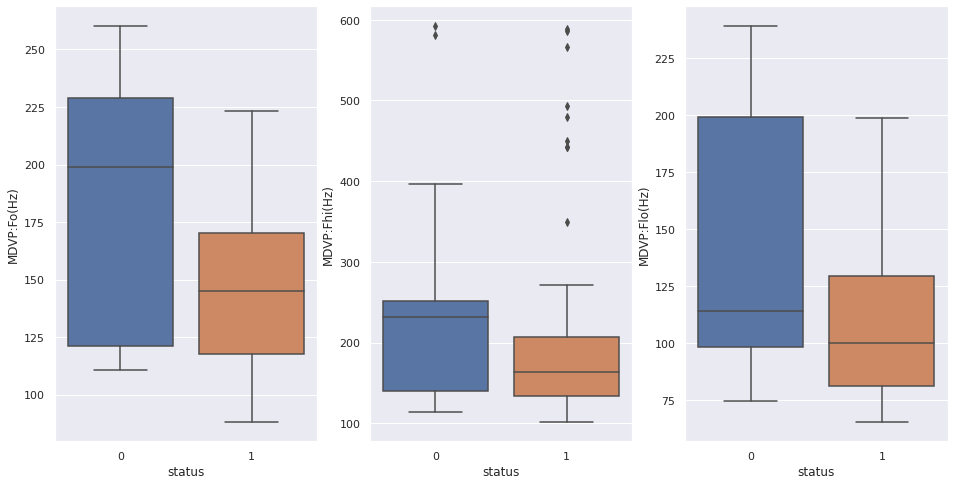

In [57]:
##EDA 2: Vocal frequency comparison between people having PD (status=1) and people not having PD (status=0).
fig, ax = plt.subplots(1,3,figsize=(16,8))
sns.boxplot(x='status',y=Atr1g2,data=udata,ax=ax[0])
sns.boxplot(x='status',y=Atr2g2,data=udata,ax=ax[1])
sns.boxplot(x='status',y=Atr3g2,data=udata,ax=ax[2])

MDVP:Fo(Hz)
    - The median value of subject diagnosed with PD is around 145 whereas median value of people not diagnosed with PD is 200

MDVP:Fhi(Hz)
    - The median value of subject diagnosed with PD is around 170 whereas median value of people not diagnosed with PD is 230

MDVP:Flo(Hz)
    - The median value of subject diagnosed with PD is around 100 whereas median value of people not diagnosed with PD is 117

For all the 3 vocal fundamental frequency measures, it is quite evident that range of vocal frequency is more for people not having PD when compared to people haing PD.


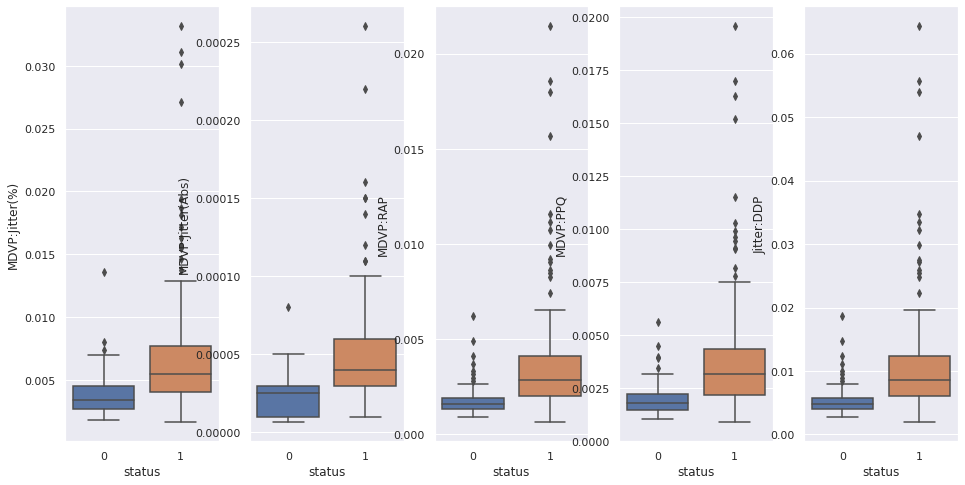

In [58]:
##EDA 3: Comparison of measures of variation in fundamental frequency between people having PD (status=1) and people not having PD (status=0).
fig, ax = plt.subplots(1,5,figsize=(16,8))
sns.boxplot(x='status',y=Atr1g3,data=udata,ax=ax[0])
sns.boxplot(x='status',y=Atr2g3,data=udata,ax=ax[1])
sns.boxplot(x='status',y=Atr3g3,data=udata,ax=ax[2])
sns.boxplot(x='status',y=Atr4g3,data=udata,ax=ax[3])
sns.boxplot(x='status',y=Atr5g3,data=udata,ax=ax[4])

For all the measures of variation in fundamental frequency, it is quite evident that range of variation is more for people having PD when compared to people not having PD. There seem to be more outliars for people having PD when compared to people not having PD.

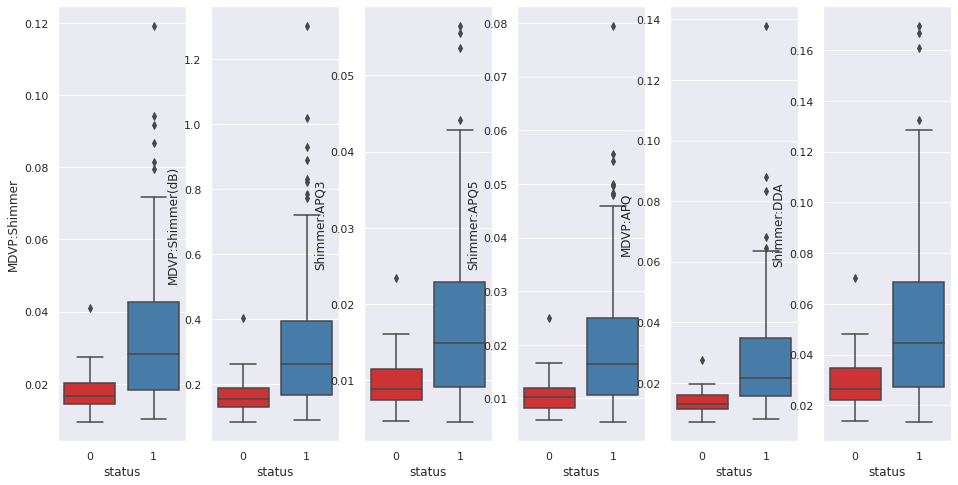

In [59]:
##EDA 4: Comparison of measures of variation in amplitude between people having PD (status=1) and people not having PD (status=0).
fig, ax = plt.subplots(1,6,figsize=(16,8))
sns.boxplot(x='status',y=Atr1g4,data=udata,ax=ax[0],palette="Set1")
sns.boxplot(x='status',y=Atr2g4,data=udata,ax=ax[1],palette="Set1")
sns.boxplot(x='status',y=Atr3g4,data=udata,ax=ax[2],palette="Set1")
sns.boxplot(x='status',y=Atr4g4,data=udata,ax=ax[3],palette="Set1")
sns.boxplot(x='status',y=Atr5g4,data=udata,ax=ax[4],palette="Set1")
sns.boxplot(x='status',y=Atr6g4,data=udata,ax=ax[5],palette="Set1")

For all the measures of variation in amplitude, it is quite evident that range of variation is more for people having PD when compared to people not having PD. There seem to be more outliars for people having PD when compared to people not having PD. <br>
For all the attributes median of subjects diagnosed with Parkinson Disease is more than the median of subjects not diagnosed with Parkison Disease. 

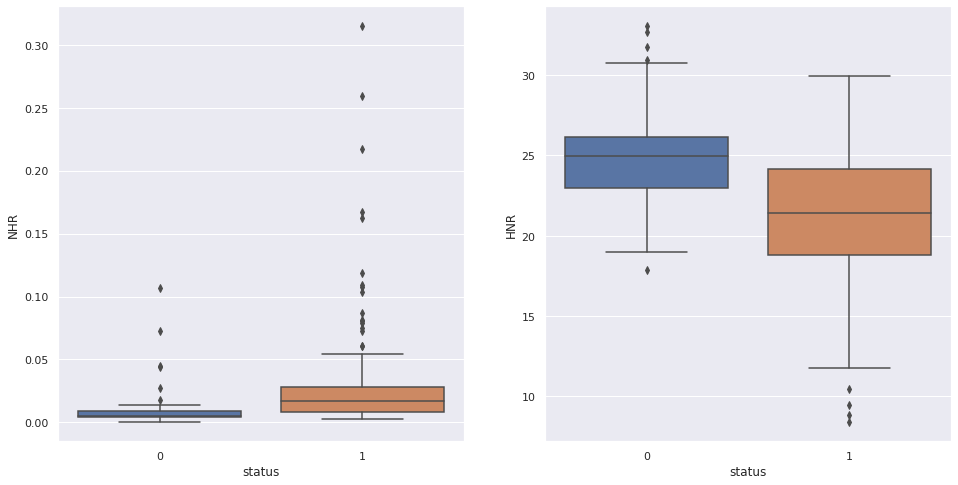

In [60]:
##EDA 5: Comparison of Two measures of ratio of noise to tonal components in the voice between people having PD (status=1) and people not having PD (status=0).
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x='status',y=Atr1g5,data=udata,ax=ax[0])
sns.boxplot(x='status',y=Atr2g5,data=udata,ax=ax[1])

NHR
1. The range of variation is more for subjects having PD when compared to people not having PD.
2. There seem to be more outliars for subjects having PD when compared to people not having PD. 
3. Median of subjects diagnosed with Parkinson Disease is more than the median of subjects not diagnosed with Parkison Disease. <br>

HNR <br>

1. The range of variation is more for subjects having PD when compared to people not having PD. However, ratio of noise to tonal component in voice seem to be more for subject not having PD.
2. The density of outliars seems to be similar for subjects having PD and subjects not having PD. Density of Outliars for subjects not having PD seems to be on the right and the density of outliars for subjects having PD seems to be on the left.
3. Median of subjects diagnosed with Parkinson Disease is less than the median of subjects not diagnosed with Parkison Disease. 

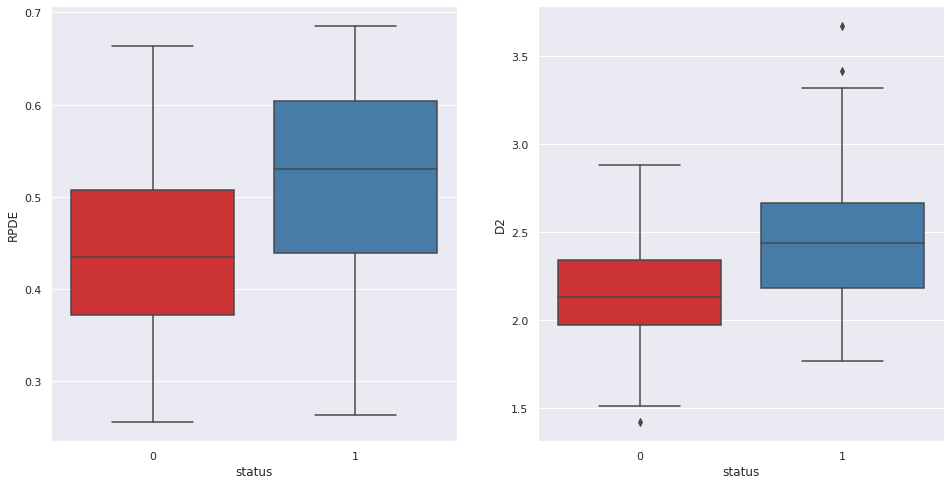

In [61]:
##EDA 6: Comparison of Two nonlinear dynamical complexity measures between people having PD (status=1) and people not having PD (status=0).
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x='status',y=Atr1g7,data=udata,ax=ax[0],palette="Set1")
sns.boxplot(x='status',y=Atr2g7,data=udata,ax=ax[1],palette="Set1")

RPDE
1. The range of variation is more for subjects having PD when compared to people not having PD.
2. There doesnt seem to be any outliars for both the status. 
3. Median of subjects diagnosed with Parkinson Disease is more than the median of subjects not diagnosed with Parkison Disease. <br>

D2 <br>

1. The range of variation is more for subjects having PD when compared to people not having PD.
2. There are outliars for both the status. Outliars for subjects having PD seems to be on the right and the outliars for subjects not having PD seems to be on the left.
3. Median of subjects diagnosed with Parkinson Disease is more than the median of subjects not diagnosed with Parkison Disease. 

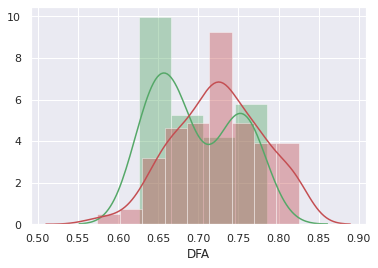

In [62]:
##EDA 7: Comparison of Signal fractal scaling exponent between people having PD (status=1) and people not having PD (status=0).

sns.distplot( udata[udata.status == 0][Atr1g8], color = 'g')
sns.distplot( udata[udata.status == 1][Atr1g8], color = 'r')

# sns.boxplot(x='status',y=Atr1g8,data=udata,palette="Set1")

DFA
1. The range of Signal fractal scaling exponent is more for subjects having PD when compared to people not having PD.
2. There doesnt seem to be any outliars for both the status. 
3. Median of subjects diagnosed with Parkinson Disease is more than the median of subjects not diagnosed with Parkison Disease. <br>

### Intermediate Step - Checking and removing multi-collinearity

As seen in the section 2.7 (correlation heat map); it was quite evident that independent attributes have high correlation.<br> In this step we will check the multicollinearity by computing VIF (Variable Inflation Factors) score; VIF score of an independent variable represents how well the variable is explained by other independent variables.

MultiCollinearity: Multicolinearity exists when there is high correlation between multiple independent variables. This might be a problem since, we would not be able to distinguish between the individual effects of the independent variables on the dependent variable. We'll try to identify the multi-collinearity by leveraging VIF (Variable Inflation Factor) and if it is found to be high then we will attempt at reducing the multi-collinearity by deleting few variables with high VIF.



In [63]:
# lets make a copy of the data
pdata=udata.copy()

In [64]:

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [65]:
calc_vif(round(pdata,2))

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables         VIF
0        MDVP:Fo(Hz)   53.518297
1       MDVP:Fhi(Hz)    8.795329
2       MDVP:Flo(Hz)   17.257065
3     MDVP:Jitter(%)    7.607233
4   MDVP:Jitter(Abs)         NaN
5           MDVP:RAP    6.262228
6           MDVP:PPQ    6.428414
7         Jitter:DDP   17.730525
8       MDVP:Shimmer  127.969986
9   MDVP:Shimmer(dB)  179.950644
10      Shimmer:APQ3   50.975323
11      Shimmer:APQ5   50.757486
12          MDVP:APQ   38.045755
13       Shimmer:DDA  116.417709
14               NHR    9.295047
15               HNR  113.513848
16            status    7.088918
17              RPDE   55.616809
18               DFA  381.938145
19           spread1  352.310026
20           spread2   20.357928
21                D2   94.474447
22               PPE   96.187989

observation:
1. From the VIF scores computed above, it clearly appears that dataset has high multicollinearity.
2. As discussed above, multicollinearity occurs when two or more independent variables are highly correlated with one another; which means that an independent variable can be predicted from another independent variable. Hence, we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.
2. It is important to reduce the multicollinearity; else our model might give biased outputs. 
3. <font color='red'> __We will follow the approach of deleting one attribute at a time and checking the VIF of the remaining attributes. We will continue to delete one attribute and check VIF of remaining till VIF of remaining attributes is less than 10__  </font>

In [66]:
# The attribute with the highest VIF is DFA. Dropping DFA from the dataset. 
#We also noticed that VIF of MDVP:Jitter(Abs) is Not a number. Hence, we will drop MDVP:Jitter(Abs) as well.
# we will also drop Status; since it is a target variable
pdata=pdata.drop(['DFA','MDVP:Jitter(Abs)','status'],axis=1)

In [67]:
# computing VIF of remaining attributes
calc_vif(round(pdata,2))

variables         VIF
0        MDVP:Fo(Hz)   43.626409
1       MDVP:Fhi(Hz)    8.414154
2       MDVP:Flo(Hz)   16.429654
3     MDVP:Jitter(%)    7.287722
4           MDVP:RAP    6.188621
5           MDVP:PPQ    6.264600
6         Jitter:DDP   17.151583
7       MDVP:Shimmer  127.960825
8   MDVP:Shimmer(dB)  176.304571
9       Shimmer:APQ3   50.830237
10      Shimmer:APQ5   49.999036
11          MDVP:APQ   37.707848
12       Shimmer:DDA  115.723791
13               NHR    7.935043
14               HNR  107.650431
15              RPDE   53.831297
16           spread1  176.171204
17           spread2   19.784841
18                D2   90.928419
19               PPE   60.468166

In [68]:
# It is clearly noticable that VIF of other variable has decreased when we dropped DFA from the data set.
# We will continue to delete one attribute at a time and check till the VIF of the remaining attributes is below 10; 
# and we will select the attribute with highest VIF for deletion.
pdata=pdata.drop(['MDVP:Shimmer(dB)','spread1','MDVP:Shimmer','D2','Shimmer:DDA','RPDE','Shimmer:APQ5','MDVP:Fo(Hz)',
                  'PPE','HNR','Shimmer:APQ3','Jitter:DDP'],axis=1)

In [69]:
# computing VIF of remaining attributes
calc_vif(round(pdata,2))

variables       VIF
0    MDVP:Fhi(Hz)  5.269247
1    MDVP:Flo(Hz)  5.313824
2  MDVP:Jitter(%)  4.680998
3        MDVP:RAP  4.362311
4        MDVP:PPQ  3.948684
5        MDVP:APQ  7.240203
6             NHR  5.278017
7         spread2  8.244022

### Step4: Split the data into training and test set in the ratio of 70:30 respectively

In [70]:
# lets build our classification model
# independent variables
X = pdata
# X=pd.DataFrame(X_stand1)
# the dependent variable
y = udata['status']

In [71]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [72]:
# lets check split of data
print("{0:0.2f}% data is in training set".format((len(X_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(pdata.index)) * 100))

69.74% data is in training set
30.26% data is in test set


In [73]:
y_train_yPD=y_train[y_train==1].count()
y_train_nPD=y_train[y_train==0].count()
y_test_yPD=y_test[y_test==1].count()
y_test_nPD=y_test[y_test==0].count()

print("In the original dataset people who had parkinson Dieases    : {0} ({1:0.2f}%)".format(len(pdata.loc[udata['status'] == 1]), (len(pdata.loc[udata['status'] == 1])/len(pdata.index)) * 100))
print("In the original dataset people who didnot have Parkinson Disease   : {0} ({1:0.2f}%)".format(len(pdata.loc[udata['status'] == 0]), (len(pdata.loc[udata['status'] == 0])/len(pdata.index)) * 100))
print("")
print("In the training dataset people who who had parkinson Dieases    : {0} ({1:0.2f}%)".format(y_train_yPD, (y_train_yPD/len(y_train))*100))
print("In the training dataset people who didnot have Parkinson Disease    : {0} ({1:0.2f}%)".format(y_train_nPD, (y_train_nPD/len(y_train))*100))
print("")
print("In the test dataset people who who had parkinson Dieases    : {0} ({1:0.2f}%)".format(y_test_yPD, (y_test_yPD/len(y_test))*100))
print("In the test dataset people who didnot have Parkinson Disease    : {0} ({1:0.2f}%)".format(y_test_nPD, (y_test_nPD/len(y_test))*100))

In the original dataset people who had parkinson Dieases    : 147 (75.38%)
In the original dataset people who didnot have Parkinson Disease   : 48 (24.62%)

In the training dataset people who who had parkinson Dieases    : 107 (78.68%)
In the training dataset people who didnot have Parkinson Disease    : 29 (21.32%)

In the test dataset people who who had parkinson Dieases    : 40 (67.80%)
In the test dataset people who didnot have Parkinson Disease    : 19 (32.20%)


### Step 5 Prepare the data for training - Scale the data if necessary, get rid of missing values (if any) etc

Before we move forward, it is very important to process the data owning to the observations made as conclusion of step 2. <br>Referring them again:
Observations and likely challenges in the dataset:
1. Scaling: Different independent variables have different scales e.g: DB, %age, Hz etc
2. Multi-collinearity (we have resolved the same in the previous step)

We will also check present of any missing values in the training and testing data.

#### Step5.a: Scaling of data. 

From the dataset it is quite evident that different independent variables have different scales e.g: DB, %age, Hz etc. Now, Machine learning algorithms dont recognize the unit of data; Hence, it won't be prudent to compare DB with a %age or %age with Hz. Higher ranging numbers in one of the attributes will have superiority. 
10 DB and 10% means different but machine learning algorithm understand both to be the same.<br><br>
Scales impacts
1. gradient descent based algorithms like Linear Regression, Logistics Regression
2. Distance based algorithms like KNN, K-means and SVM

Scales dont impact:
1. Tree based algorithms like Decision trees

In [74]:
# lets create a copy of the train and test data for scaling
X_Train_stand = X_train.copy()
X_Test_stand = X_test.copy()

In [75]:
# we will use standard scaler for scaling the data.
scale = StandardScaler().fit(X_Train_stand)

In [76]:
X_train= scale.transform(X_Train_stand)
X_test= scale.transform(X_Test_stand)

#### Step5.b: Identifying null values. 

In [77]:
#while we have already checked in the section 2.4 leveraging fuction info() that there are no null values. 
# Still lets identify and count the null values

if (pd.DataFrame(X_train).isnull().sum().any()==0):
    print('There are no null values in the training datset')
else:
    print('There are null values in the training datset')

if (pd.DataFrame(X_test).isnull().sum().any()==0):
    print('There are no null values in the test datset')
else:
    print('There are null values in the test datset')

There are no null values in the training datset
There are no null values in the test datset


### Step6: Train at least 3 standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data

We will train the following classification algorithms:
1. Logistic Regression
2. KNN
3. Naive Bayes
4. SVM

Post training the model, in addition to the accuracy; we will also compute<br>
1. Confusion Matrix
2. Classification Report <br>

For the provided dataset, accuracy might not be the only most important score; but recall (which is out of all subjects who had Parkinson Disease, how many actually had the disease) is the most important score; since our aim should be to identify as much subjects with disease as possible. 

The following are the performance measures:<br>
1. The accuracy: It is out of all subjects in the data, how many were predicted correctly for having the disease or not having the disease = ((TP+TN)/(TP+TN+FP+FN))<br>
2. The precision: It is out of all subjects who were predicted to have Parkinson Disease, how many actually had parkinson Disease = (TP/(TP+FP))<br>
3. The recall: It is out of all subjects who had parkinson Disease, how many did we identify =  ((TP/(TP+FN)))<br>
4. The F1 score which is computed considering both precision and recall together: 2*P*R/(P+R)<br>

The accuracy, precision, accuracy, F1 score can be computed (referring the formulas above) as well as referred from the classification report

#### Classification Model 1: Logistic Regression

In [78]:
# Fit the model on train data
model = LogisticRegression(solver="liblinear")
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [79]:
# predict on the test data
y_predict_LR = model.predict(X_test)
y_predict_LR

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [80]:
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
coef_df

0         1         2         3         4         5         6  \
0 -0.37033 -0.434062 -0.383377  0.691242  0.370025  1.111399 -0.270629   

          7  intercept  
0  0.729314   1.986594

In [81]:
model_score_LR = model.score(X_test, y_test)
print("Model Accuracy of Logistic Regression is: {0:.4f}".format(model_score_LR))
print()

Model Accuracy of Logistic Regression is: 0.8136



##### Confusion Matrix: Logistic Regression

Confusion Matrix - Logistic Regression


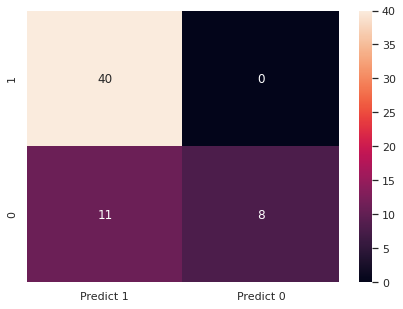

In [82]:
print("Confusion Matrix - Logistic Regression")
cm=metrics.confusion_matrix(y_test, y_predict_LR, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: Logistic Regression

True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 40

True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 8

False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 11

False Negatives (FN):  We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD:  0 

In [83]:
print("Classification Report - Logistic Regression")
print(metrics.classification_report(y_test, y_predict_LR, labels=[1, 0]))

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           1       0.78      1.00      0.88        40
           0       1.00      0.42      0.59        19

    accuracy                           0.81        59
   macro avg       0.89      0.71      0.74        59
weighted avg       0.85      0.81      0.79        59



Performance measures of Logistic Regression:
1. The accuracy of the logistic Regression model is 0.81
2. The recall of the logistic Regression model is 1.00
3. The precision of the logistic Regression model is 0.78
4. The F1 score of the logistic Regression model is 0.88

Observation:
1. The recall of the logistic Regression model is 1; which means we were able to idetify all the subjects who had the disease.
2. We will compare these results with other models to identify the best model

#### Classification Model 2: KNN

In [84]:
# Call Nearest Neighbour algorithm and fit the model on train data
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(X_train, np.ravel(y_train,order='C'))

KNeighborsClassifier(weights='distance')

In [85]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. 
#The majority class will be assigned to the test data point

y_predict_KNN = NNH.predict(X_test)
model_score_KNN = NNH.score(X_test, y_test)

print("Model Accuracy of KNN is: {0:.4f}".format(model_score_KNN))
print()

Model Accuracy of KNN is: 0.8305



##### Confusion Matrix: KNN

Confusion Matrix - KNN


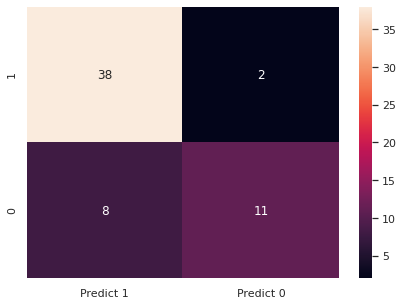

In [86]:
print("Confusion Matrix - KNN")
cm=metrics.confusion_matrix(y_test, y_predict_KNN, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: KNN

True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 38

True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 11

False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 8

False Negatives (FN):  We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD:  2 

In [87]:
print("Classification Report - KNN")
print(metrics.classification_report(y_test, y_predict_KNN, labels=[1, 0]))

Classification Report - KNN
              precision    recall  f1-score   support

           1       0.83      0.95      0.88        40
           0       0.85      0.58      0.69        19

    accuracy                           0.83        59
   macro avg       0.84      0.76      0.79        59
weighted avg       0.83      0.83      0.82        59



Performance measures of KNN:
1. The accuracy of the KNN model is 0.83
2. The recall of the KNN model is 0.95
3. The precision of the KNN model is 0.83
4. The F1 score of the KNN model is 0.88

Observation:
1. The recall of the KNN model is 0.95; which means we were not able to idetify all the subjects who had the disease.
2. When compared to Logistics Regression, while this model had better accuracy; however, KNN is not able to identify all the subjects with the disease.

#### Classification Model 3: Naïve Bayes

In [88]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [89]:
y_predict_NB = NB_model.predict(X_test)
model_score_NB=metrics.accuracy_score(y_test, y_predict_NB)

print("Model Accuracy of Naive Bayes is: {0:.4f}".format(model_score_NB))
print()

Model Accuracy of Naive Bayes is: 0.6102



##### Confusion Matrix: Naïve Bayes

Confusion Matrix - Naive Bayes


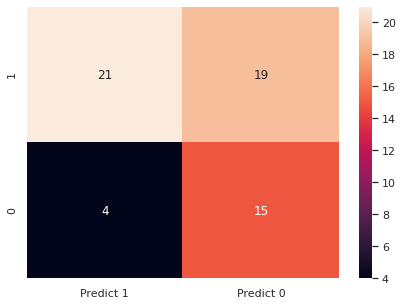

In [90]:
print("Confusion Matrix - Naive Bayes")
cm=metrics.confusion_matrix(y_test, y_predict_NB, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: Naive Bayes

True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 21

True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 15

False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 4

False Negatives (FN):  We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD: 19 

In [91]:
print("Classification Report - Naive Bayes")
print(metrics.classification_report(y_test, y_predict_NB, labels=[1, 0]))

Classification Report - Naive Bayes
              precision    recall  f1-score   support

           1       0.84      0.53      0.65        40
           0       0.44      0.79      0.57        19

    accuracy                           0.61        59
   macro avg       0.64      0.66      0.61        59
weighted avg       0.71      0.61      0.62        59



Performance measures of Naive Bayes:
1. The accuracy of the Naive Bayes model is 0.61
2. The recall of the Naive Bayes model is 0.53
3. The precision of the Naive Bayes model is 0.84
4. The F1 score of the Naive Bayes model is 0.65

Observation:
1. Out of the 3 model trained, Naive Bayes model has the worst Recall and it is quite evident that we were not able to idetify all the subjects who had the disease.
2. When compared to Logistics Regression and KNN, this is the worst performing model on all parameters.

#### Classification Model 4: SVM

In [92]:
clf = svm.SVC(gamma=0.025, C=3) 

In [93]:
clf.fit(X_train , y_train)

SVC(C=3, gamma=0.025)

In [94]:
y_predict_SVM = clf.predict(X_test)

In [95]:
model_score_NB=metrics.accuracy_score(y_test, y_predict_SVM)

print("Model Accuracy of SVM is: {0:.4f}".format(model_score_NB))
print()

Model Accuracy of SVM is: 0.8136



##### Confusion Matrix: SVM

Confusion Matrix - SVM


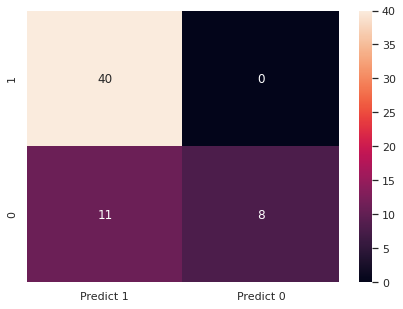

In [96]:
print("Confusion Matrix - SVM")
cm=metrics.confusion_matrix(y_test, y_predict_SVM, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: SVM

True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 40

True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 8

False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 11

False Negatives (FN):  We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD: 0 

##### Classification Report: SVM

In [97]:
print("Classification Report - SVM")
print(metrics.classification_report(y_test, y_predict_SVM, labels=[1, 0]))

Classification Report - SVM
              precision    recall  f1-score   support

           1       0.78      1.00      0.88        40
           0       1.00      0.42      0.59        19

    accuracy                           0.81        59
   macro avg       0.89      0.71      0.74        59
weighted avg       0.85      0.81      0.79        59



Performance measures of SVM:
1. The accuracy of the SVM model is 0.81
2. The recall of the SVM model is 1.00
3. The precision of the SVM model is 0.78
4. The F1 score of the SVM model is 0.88

Observation:
1. The recall of the SVM model is 1; which means we were able to idetify all the subjects who had the disease.

### Step7: Train a meta-classifier and note the accuracy on test data

We will train 2 meta classifiers<br>
1. Stacking from the library vecstack.<br>
    - The models selected as estimators are KNN,Random Forest and XGBClassifier <br>
    - The meta model selected is XGBClassifier
2. Stacking classifier from the library SKlearn<br>
    - The models selected as estimators are KNN,Random Forest and XGBClassifier <br>
    - The meta model selected is XGBClassifier


#### Meta Classifier Model 1: Stacking from Vecstack

In [98]:
models = [
    KNeighborsClassifier(n_neighbors=5),
    RandomForestClassifier(random_state=0, n_estimators=100, max_depth=3),
    XGBClassifier(random_state=0, learning_rate=0.1, n_estimators=100, max_depth=3)
]

In [99]:
S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=False, mode='oof_pred_bag',metric=accuracy_score, n_folds=5, 
                           stratified=True, shuffle=True, random_state=0, verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.78571429]
    fold  1:  [0.92592593]
    fold  2:  [0.81481481]
    fold  3:  [0.88888889]
    fold  4:  [0.85185185]
    ----
    MEAN:     [0.85343915] + [0.05018373]
    FULL:     [0.85294118]

model  1:     [RandomForestClassifier]
    fold  0:  [1.00000000]
    fold  1:  [0.92592593]
    fold  2:  [0.85185185]
    fold  3:  [0.88888889]
    fold  4:  [0.74074074]
    ----
    MEAN:     [0.88148148] + [0.08574694]
    FULL:     [0.88235294]

model  2:     [XGBClassifier]
    fold  0:  [0.92857143]
    fold  1:  [0.96296296]
    fold  2:  [0.81481481]
    fold  3:  [0.92592593]
    fold  4:  [0.88888889]
    ----
    MEAN:     [0.90423280] + [0.05048407]
    FULL:     [0.90441176]



In [100]:
model = XGBClassifier(random_state=0, learning_rate=0.1, n_estimators=100, max_depth=3)
model = model.fit(S_train, y_train)
y_predict_Stack1 = model.predict(S_test)
print('The accuracy of the meta Classfier 1 is: [%.8f]' % metrics.accuracy_score(y_test, y_predict_Stack1))

The accuracy of the meta Classfier 1 is: [0.84745763]


##### Confusion Matrix: Meta Classifier 1

Confusion Matrix - Meta Classifier 1


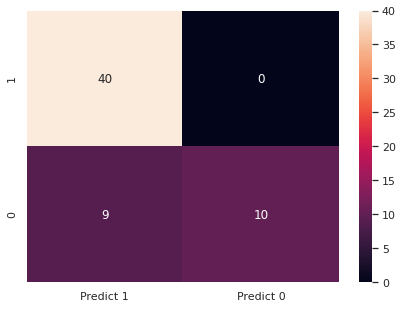

In [101]:
print("Confusion Matrix - Meta Classifier 1")
cm=metrics.confusion_matrix(y_test, y_predict_Stack1, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: Meta Classifier 1

True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 40

True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 10

False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 9

False Negatives (FN):  We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD: 0 

##### Classification Report: Meta Classifier 1

In [102]:
print("Classification Report - Meta-Classifier 1")
print(metrics.classification_report(y_test, y_predict_Stack1, labels=[1, 0]))

Classification Report - Meta-Classifier 1
              precision    recall  f1-score   support

           1       0.82      1.00      0.90        40
           0       1.00      0.53      0.69        19

    accuracy                           0.85        59
   macro avg       0.91      0.76      0.79        59
weighted avg       0.88      0.85      0.83        59



Performance measures of Meta Classifier 1:
1. The accuracy of the Meta Classifier model is 0.85
2. The recall of the Meta Classifier model is 1.00
3. The precision of the Meta Classifier model is 0.82
4. The F1 score of the Meta Classifier model is 0.90

Observation:
1. Meta classifier 1 has a recall of 1 which means that we were able to identify all the subjects who had Parkinson Disease.

#### Meta Classifier Model 2: Stacking Classifier from SKLearn

In [103]:
estimators = [
    ('rf', RandomForestClassifier(random_state=0, n_estimators=100, max_depth=3)),
#     ('lr', LogisticRegression(solver="liblinear")),
    ('knn',KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )),
    ('XGB',XGBClassifier(random_state=0, learning_rate=0.1, n_estimators=100, max_depth=3))
]

In [104]:
clf = StackingClassifier(
    estimators=estimators, final_estimator=XGBClassifier()
)

In [105]:
model = clf.fit(X_train, y_train)
y_predict_Stack2 = model.predict(X_test)
print('The accuracy of the meta classifier 2 is: [%.8f]' % accuracy_score(y_test, y_predict_Stack2))

The accuracy of the meta classifier 2 is: [0.86440678]


##### Confusion Matrix: Meta Classifier 2

Confusion Matrix - Meta Classifer 2


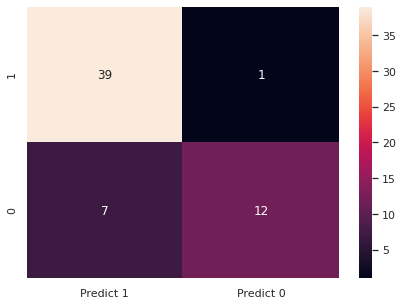

In [106]:
print("Confusion Matrix - Meta Classifer 2")
cm=metrics.confusion_matrix(y_test, y_predict_Stack2, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: Meta Classifier 2

True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 39

True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 12

False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 7

False Negatives (FN):  We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD: 1 

##### Classification Report: Meta Classifier 2

In [107]:
print("Classification Report - Meta-Classifier 2")
print(metrics.classification_report(y_test, y_predict_Stack2, labels=[1, 0]))

Classification Report - Meta-Classifier 2
              precision    recall  f1-score   support

           1       0.85      0.97      0.91        40
           0       0.92      0.63      0.75        19

    accuracy                           0.86        59
   macro avg       0.89      0.80      0.83        59
weighted avg       0.87      0.86      0.86        59



Performance measures of Meta Classifier 2:
1. The accuracy of the Meta Classifier 2 model is 0.86
2. The recall of the Meta Classifier model is 0.97
3. The precision of the Meta Classifier model is 0.85
4. The F1 score of the Meta Classifier model is 0.91

Observation:
1. Meta classifier 2 has a recall of less than 1 which means that we were not able to identify all the subjects who had Parkinson Disease.

### Step8: Train at least one standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy

We will train the following classification algorithms:
1. Random Forest
2. Bagging
3. Ada Boost
4. XGB Classifer

Post training the model, in addition to the accuracy; we will also compute<br>
1. Confusion Matrix
2. Classification Report <br>

For the provided dataset, accuracy might not be the only most important score; but recall (which is out of all subjects who had Parkinson Disease, how many actually had the disease) is the most important score; since our aim should be to identify as much subjects with disease as possible. 

The following are the performance measures:<br>
1. The accuracy: It is out of all subjects in the data, how many were predicted correctly for having the disease or not having the disease = ((TP+TN)/(TP+TN+FP+FN))<br>
2. The precision: It is out of all subjects who were predicted to have Parkinson Disease, how many actually had parkinson Disease = (TP/(TP+FP))<br>
3. The recall: It is out of all subjects who had parkinson Disease, how many did we identify =  ((TP/(TP+FN)))<br>
4. The F1 score which is computed considering both precision and recall together: 2*P*R/(P+R)<br>

The accuracy, precision, accuracy, F1 score can be computed (referring the formulas above) as well as referred from the classification report

#### Ensemble Model 1: Random Forest

In [108]:
model_rf = RandomForestClassifier(n_estimators = 50,random_state=1,max_features=3) 
model_rf = model_rf.fit(X_train, y_train)

In [109]:
y_predict_rf = model_rf.predict(X_test)
print(model_rf.score(X_test, y_test))

0.864406779661017


##### Confusion Matrix: Random Forest

Confusion Matrix -Random Forest


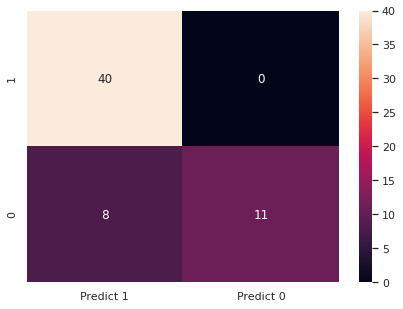

In [110]:
print("Confusion Matrix -Random Forest")
cm=metrics.confusion_matrix(y_test, y_predict_rf, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: Random Forest

True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 40

True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 11

False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 8

False Negatives (FN):  We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD: 0 

##### Classification Report: Random Forest

In [111]:
print("Classification Report - Random Forest")
print(metrics.classification_report(y_test, y_predict_rf, labels=[1, 0]))

Classification Report - Random Forest
              precision    recall  f1-score   support

           1       0.83      1.00      0.91        40
           0       1.00      0.58      0.73        19

    accuracy                           0.86        59
   macro avg       0.92      0.79      0.82        59
weighted avg       0.89      0.86      0.85        59



Performance measures of Random Forest:
1. The accuracy of the Random Forest model is 0.86
2. The recall of the Random Forest model is 1.00
3. The precision of the Random Forest model is 0.83
4. The F1 score of the Random Forest model is 0.91

Observation:
1. Random Forest has a recall of 1 which means that we were able to identify all the subjects who had Parkinson Disease.

#### Ensemble Model 2: Bagging

In [112]:
bgcl = BaggingClassifier(n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

In [113]:
y_predict_bag = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))

0.8813559322033898


##### Confusion Matrix: Bagging Classifier

Confusion Matrix -Bagging Classifier


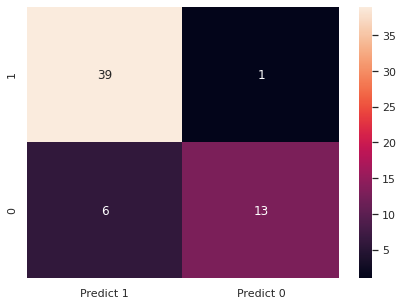

In [114]:
print("Confusion Matrix -Bagging Classifier")
cm=metrics.confusion_matrix(y_test, y_predict_bag, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: Bagging Classifier

True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 40

True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 12

False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 7

False Negatives (FN):  We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD: 0 

##### Classification Report: Bagging Classifier

In [115]:
print("Classification Report - Bagging Classifier")
print(metrics.classification_report(y_test, y_predict_bag, labels=[1, 0]))

Classification Report - Bagging Classifier
              precision    recall  f1-score   support

           1       0.87      0.97      0.92        40
           0       0.93      0.68      0.79        19

    accuracy                           0.88        59
   macro avg       0.90      0.83      0.85        59
weighted avg       0.89      0.88      0.88        59



Performance measures of Bagging:
1. The accuracy of the Bagging model is 0.88
2. The recall of the Bagging model is 1.00
3. The precision of the Bagging model is 0.85
4. The F1 score of the Bagging model is 0.92

Observation:
1. Bagging has a recall of 1 which means that we were able to identify all the subjects who had Parkinson Disease.

#### Ensemble Model 3: Ada Boost

In [116]:
AdaBC = AdaBoostClassifier(n_estimators=50, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
AdaBC = AdaBC.fit(X_train, y_train)

In [117]:
y_predict_ada = AdaBC.predict(X_test)
print(AdaBC.score(X_test , y_test))

0.8813559322033898


##### Confusion Matrix: Ada Boost

Confusion Matrix -Ada Boost


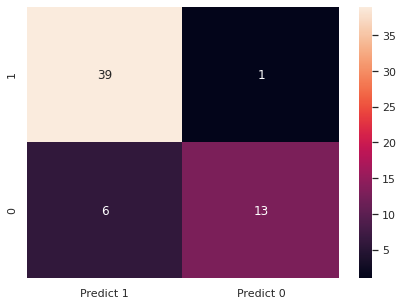

In [118]:
print("Confusion Matrix -Ada Boost")
cm=metrics.confusion_matrix(y_test, y_predict_ada, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: Ada Boost

True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 39

True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 13

False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 6

False Negatives (FN):  We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD: 1 

##### Classification Report: Ada Boost

In [119]:
print("Classification Report - Ada Boost")
print(metrics.classification_report(y_test, y_predict_ada, labels=[1, 0]))

Classification Report - Ada Boost
              precision    recall  f1-score   support

           1       0.87      0.97      0.92        40
           0       0.93      0.68      0.79        19

    accuracy                           0.88        59
   macro avg       0.90      0.83      0.85        59
weighted avg       0.89      0.88      0.88        59



Performance measures of Ada boost:
1. The accuracy of the Ada boost model is 0.88
2. The recall of the Ada boost model is 0.97
3. The precision of the Ada boost model is 0.87
4. The F1 score of the Ada boost model is 0.92

Observation:
1. Ada boost has a recall of 0.97 which means that we were not able to identify all the subjects who had Parkinson Disease.

#### Ensemble Model 4: XG Boost

In [120]:
model = XGBClassifier(random_state=0, learning_rate=0.1, n_estimators=100, max_depth=4)
model = model.fit(X_train, y_train)
y_predict_XGB = model.predict(X_test)
print('The accuracy of the XGB Classifier is: [%.8f]' % accuracy_score(y_test, y_predict_XGB))

The accuracy of the XGB Classifier is: [0.89830508]


##### Confusion Matrix: XGB Classifier

Confusion Matrix - XGB Classifier


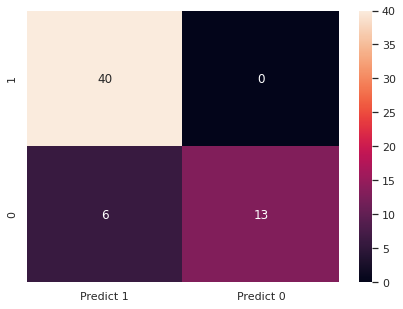

In [121]:
print("Confusion Matrix - XGB Classifier")
cm=metrics.confusion_matrix(y_test, y_predict_XGB, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: XG Boost

True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 40

True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 13

False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 6

False Negatives (FN):  We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD: 0 

##### Classification Report: XGB Classifier

In [122]:
print("Classification Report - XGB Classifier")
print(metrics.classification_report(y_test, y_predict_XGB, labels=[1, 0]))

Classification Report - XGB Classifier
              precision    recall  f1-score   support

           1       0.87      1.00      0.93        40
           0       1.00      0.68      0.81        19

    accuracy                           0.90        59
   macro avg       0.93      0.84      0.87        59
weighted avg       0.91      0.90      0.89        59



Performance measures of XG boost:
1. The accuracy of the XG boost model is 0.90
2. The recall of the XG boost model is 1.0
3. The precision of the XG boost model is 0.87
4. The F1 score of the XG boost model is 0.93

Observation:
1. XG boost has a recall of 1 which means that we were able to identify all the subjects who had Parkinson Disease.

### Step9: Compare all the models (minimum 5) and pick the best one among them

We will consolidate all the models into a table for quick reference and then make our observations<br>
To do the same, we will create summary of all the models and then call them inside a data frame

##### Step 9.1: Summarise all the models

In [123]:
# Model1: Logistic Summary
Accuracy_LR=round(metrics.accuracy_score(y_test, y_predict_LR),2)
Recall_LR=round(metrics.recall_score(y_test, y_predict_LR),2)
Precision_LR=round(metrics.precision_score(y_test, y_predict_LR),2)
F1_LR=round(metrics.f1_score(y_test, y_predict_LR),2)

In [124]:
# Model2: KNN Summary
Accuracy_KNN=round(metrics.accuracy_score(y_test, y_predict_KNN),2)
Recall_KNN=round(metrics.recall_score(y_test, y_predict_KNN),2)
Precision_KNN=round(metrics.precision_score(y_test, y_predict_KNN),2)
F1_KNN=round(metrics.f1_score(y_test, y_predict_KNN),2)

In [125]:
# Model3:Native Bayes Summary
Accuracy_NB=round(metrics.accuracy_score(y_test, y_predict_NB),2)
Recall_NB=round(metrics.recall_score(y_test, y_predict_NB),2)
Precision_NB=round(metrics.precision_score(y_test, y_predict_NB),2)
F1_NB=round(metrics.f1_score(y_test, y_predict_NB),2)

In [126]:
# Model4:SVM Summary
Accuracy_SVM=round(metrics.accuracy_score(y_test, y_predict_SVM),2)
Recall_SVM=round(metrics.recall_score(y_test, y_predict_SVM),2)
Precision_SVM=round(metrics.precision_score(y_test, y_predict_SVM),2)
F1_SVM=round(metrics.f1_score(y_test, y_predict_SVM),2)

In [127]:
# Model5: Meta Classifier 1 Summary
Accuracy_Stack1=round(metrics.accuracy_score(y_test, y_predict_Stack1),2)
Recall_Stack1=round(metrics.recall_score(y_test, y_predict_Stack1),2)
Precision_Stack1=round(metrics.precision_score(y_test, y_predict_Stack1),2)
F1_Stack1=round(metrics.f1_score(y_test, y_predict_Stack1),2)

In [128]:
# Model6: Meta Classifier 2 Summary
Accuracy_Stack2=round(metrics.accuracy_score(y_test, y_predict_Stack2),2)
Recall_Stack2=round(metrics.recall_score(y_test, y_predict_Stack2),2)
Precision_Stack2=round(metrics.precision_score(y_test, y_predict_Stack2),2)
F1_Stack2=round(metrics.f1_score(y_test, y_predict_Stack2),2)

In [129]:
# Model7: Random Forest Summary
Accuracy_rf=round(metrics.accuracy_score(y_test, y_predict_rf),2)
Recall_rf=round(metrics.recall_score(y_test, y_predict_rf),2)
Precision_rf=round(metrics.precision_score(y_test, y_predict_rf),2)
F1_rf=round(metrics.f1_score(y_test, y_predict_rf),2)

In [130]:
# Model8: Bagging Summary
Accuracy_bag=round(metrics.accuracy_score(y_test, y_predict_bag),2)
Recall_bag=round(metrics.recall_score(y_test, y_predict_bag),2)
Precision_bag=round(metrics.precision_score(y_test, y_predict_bag),2)
F1_bag=round(metrics.f1_score(y_test, y_predict_bag),2)

In [131]:
# Model9: Ada Boost Summary
Accuracy_ada=round(metrics.accuracy_score(y_test, y_predict_ada),2)
Recall_ada=round(metrics.recall_score(y_test, y_predict_ada),2)
Precision_ada=round(metrics.precision_score(y_test, y_predict_ada),2)
F1_ada=round(metrics.f1_score(y_test, y_predict_ada),2)

In [132]:
# Model10: XGB Summary
Accuracy_XGB=round(metrics.accuracy_score(y_test, y_predict_XGB),2)
Recall_XGB=round(metrics.recall_score(y_test, y_predict_XGB),2)
Precision_XGB=round(metrics.precision_score(y_test, y_predict_XGB),2)
F1_XGB=round(metrics.f1_score(y_test, y_predict_XGB),2)

##### Step 9.2: Summarise all the models

In [133]:
summary = {'Accuracy': [Accuracy_LR,Accuracy_KNN,Accuracy_NB,Accuracy_SVM,Accuracy_Stack1,Accuracy_Stack2,Accuracy_rf,Accuracy_bag,Accuracy_ada,
                        Accuracy_XGB],

                    'Recall': [Recall_LR,Recall_KNN,Recall_NB,Recall_SVM,Recall_Stack1,Recall_Stack2,Recall_rf,Recall_bag,Recall_ada,
                        Recall_XGB],

                     'Precision': [Precision_LR,Precision_KNN,Precision_NB,Precision_SVM,Precision_Stack1,Precision_Stack2,Precision_rf,Precision_bag,Precision_ada,
                        Precision_XGB],
                       
                       'F1Score':[F1_LR,F1_KNN,F1_NB,F1_SVM,F1_Stack1,F1_Stack2,F1_rf,F1_bag,F1_ada,
                        F1_XGB]}

models=['Logistic Regression','KNN','Naive Bayes','SVM','Meta Classifier 1','Meta Classifier 2','Random Forest','Bagging','Ada Boosting','XGB']
sum_df = pd.DataFrame(summary,models)

In [134]:
sum_df

Accuracy  Recall  Precision  F1Score
Logistic Regression      0.81    1.00       0.78     0.88
KNN                      0.83    0.95       0.83     0.88
Naive Bayes              0.61    0.52       0.84     0.65
SVM                      0.81    1.00       0.78     0.88
Meta Classifier 1        0.85    1.00       0.82     0.90
Meta Classifier 2        0.86    0.98       0.85     0.91
Random Forest            0.86    1.00       0.83     0.91
Bagging                  0.88    0.98       0.87     0.92
Ada Boosting             0.88    0.98       0.87     0.92
XGB                      0.90    1.00       0.87     0.93

##### Step 9.3: Summarising the case study and objective

Summary of the case study document and the objective of this exercise:<br>
As learnt from the case study document, Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. <br>
Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient.<br> 

Rationale behind leveraging Machine Learning Algorithm for predicting Parkinson Disease in subjects: <br>
PD patients exhibit characteristic vocal features and voice recordings are a useful and non-invasive tool for diagnosis.<br>
So this case study aims at identifying if Machine learning algorithms can be applied to a voice recording dataset to accurately diagnosis PD;<br> if this is successful then this would be an effective screening step prior to an appointment with a clinician; <br>

We performed an exhuastive EDA; reduced multicollinearity; did scaling and built multiple models; in our endeavours to identify the model which gives the best results.

##### Step 9.4: Identify the best model

The table in step 9.2 captures performance measures of all the models trained by us. <br>
Now as learnt from the case study document, our main objective is to identify all the subjects which have Parkinson Disease. <br>
The performance measure that helps with achieving this objective is Recall - Out of all the subjects who had Parkinson Disease; how many did our model identify.

The following models have the highest recall (i.e. 1.00):
1. Logistic Regression
2. SVM
3. Meta Classifier 1
4. Random Forest
5. Bagging
6. XGB

The next performance measure that we will consider is Precision -  Out of all subjects who were predicted to have Parkinson Disease, how many actually had parkinson Disease

Out of the models above (with highest Recall); <font color='blue'> XG Boost </font> has the highest precison (0.87). XG Boost also has the highest accuracy.<br>
Hence,<font color='blue'> XG Boost is selected as the best model amongst all the models </font>